In [ ]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from collections import defaultdict
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram

import missingno as msno

import random

from sklearn.model_selection import train_test_split

In [ ]:
# import dataset
df = pd.read_csv("/Users/mumer/My Data/Unipi - Study Material/Semester - 1st/DATA MINING/Project/ravdess_dm1_2223/ravdess_features.csv", skipinitialspace=True)

# Data Understanding and Preparation

## Data Understanding

In [ ]:
df.describe(include="all")

modality vocal_channel  emotion emotional_intensity  \
count         2452          2256     2452                2452   
unique           1             2        8                   2   
top     audio-only        speech  fearful              normal   
freq          2452          1335      376                1320   
mean           NaN           NaN      NaN                 NaN   
std            NaN           NaN      NaN                 NaN   
min            NaN           NaN      NaN                 NaN   
25%            NaN           NaN      NaN                 NaN   
50%            NaN           NaN      NaN                 NaN   
75%            NaN           NaN      NaN                 NaN   
max            NaN           NaN      NaN                 NaN   

                           statement repetition        actor   sex  \
count                           2452       2452  1326.000000  2452   
unique                             2          2          NaN     2   
top     Dogs are sitting by the door        2nd          NaN     M   
freq                            1226       1226          NaN  1248   
mean                             NaN        NaN    12.582202   NaN   
std                              NaN        NaN     6.916240   NaN   
min                              NaN        NaN     1.000000   NaN   
25%                              NaN        NaN     7.000000   NaN   
50%                              NaN        NaN    13.000000   NaN   
75%                              NaN        NaN    19.000000   NaN   
max                              NaN        NaN    24.000000   NaN   

           channels  sample_width  ...     stft_min  stft_max     stft_kur  \
count   2452.000000        2452.0  ...  2452.000000    2452.0  2452.000000   
unique          NaN           NaN  ...          NaN       NaN          NaN   
top             NaN           NaN  ...          NaN       NaN          NaN   
freq            NaN           NaN  ...          NaN       NaN          NaN   
mean       1.002447           2.0  ...     0.002272       1.0    -1.247929   
std        0.049416           0.0  ...     0.004830       0.0     0.211781   
min        1.000000           2.0  ...     0.000000       1.0    -1.669603   
25%        1.000000           2.0  ...     0.000000       1.0    -1.390612   
50%        1.000000           2.0  ...     0.000190       1.0    -1.292105   
75%        1.000000           2.0  ...     0.001999       1.0    -1.152519   
max        2.000000           2.0  ...     0.039378       1.0     0.794669   

          stft_skew          mean          std          min          max  \
count   2452.000000  2.452000e+03  2452.000000  2452.000000  2452.000000   
unique          NaN           NaN          NaN          NaN          NaN   
top             NaN           NaN          NaN          NaN          NaN   
freq            NaN           NaN          NaN          NaN          NaN   
mean       0.112889  1.393649e-08     0.020504    -0.164871     0.179839   
std        0.330759  4.267587e-05     0.021024     0.175443     0.195539   
min       -0.993957 -9.435575e-04     0.000652    -0.998810     0.004669   
25%       -0.094334 -1.394488e-06     0.006791    -0.202431     0.055489   
50%        0.126065 -9.810701e-08     0.013880    -0.103775     0.109726   
75%        0.335574  8.363511e-07     0.026154    -0.054352     0.224487   
max        1.465815  1.222810e-03     0.152168    -0.006134     0.999146   

                kur         skew  
count   2452.000000  2452.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean      11.203002    -0.048245  
std        6.614859     0.454925  
min        1.757794    -2.356526  
25%        6.519988    -0.336624  
50%        9.828686     0.004256  
75%       14.085435     0.262978  
max       59.085695     1.799676  

[11 rows x 38 columns]

In [ ]:
df.tail(3)

modality vocal_channel    emotion emotional_intensity  \
2449  audio-only          song        sad              strong   
2450  audio-only        speech  surprised              normal   
2451  audio-only           NaN    neutral              normal   

                         statement repetition  actor sex  channels  \
2449  Dogs are sitting by the door        2nd   23.0   M         1   
2450  Kids are talking by the door        1st    NaN   M         1   
2451  Dogs are sitting by the door        2nd   23.0   M         1   

      sample_width  ...  stft_min  stft_max  stft_kur  stft_skew  \
2449             2  ...  0.000000       1.0 -1.473789   0.130310   
2450             2  ...  0.001565       1.0 -1.277117  -0.242668   
2451             2  ...  0.000000       1.0 -1.257666  -0.237757   

              mean       std       min       max        kur      skew  
2449 -8.219263e-06  0.015384 -0.093079  0.097260   4.964319 -0.005821  
2450 -4.400898e-06  0.005182 -0.057556  0.052002  13.855588 -0.110966  
2451  6.342640e-07  0.010001 -0.081512  0.103027  12.973181  1.032081  

[3 rows x 38 columns]

In [ ]:
df.shape  # (n_rows, n_columns)

(2452, 38)

In [ ]:
df.dtypes #Data Type of each attribute

modality                object
vocal_channel           object
emotion                 object
emotional_intensity     object
statement               object
repetition              object
actor                  float64
sex                     object
channels                 int64
sample_width             int64
frame_rate               int64
frame_width              int64
length_ms                int64
frame_count            float64
intensity              float64
zero_crossings_sum       int64
mfcc_mean              float64
mfcc_std               float64
mfcc_min               float64
mfcc_max               float64
sc_mean                float64
sc_std                 float64
sc_min                 float64
sc_max                 float64
sc_kur                 float64
sc_skew                float64
stft_mean              float64
stft_std               float64
stft_min               float64
stft_max               float64
stft_kur               float64
stft_skew              float64
mean    

In [ ]:
df.info() #To check if missing values exists

#vocal_channel has 196 missing values
#actor has 1126 missing values
#intensity has 816 missing values
#total float attributes 25, int attributes 6, and object e.g. strings attributes 7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modality             2452 non-null   object 
 1   vocal_channel        2256 non-null   object 
 2   emotion              2452 non-null   object 
 3   emotional_intensity  2452 non-null   object 
 4   statement            2452 non-null   object 
 5   repetition           2452 non-null   object 
 6   actor                1326 non-null   float64
 7   sex                  2452 non-null   object 
 8   channels             2452 non-null   int64  
 9   sample_width         2452 non-null   int64  
 10  frame_rate           2452 non-null   int64  
 11  frame_width          2452 non-null   int64  
 12  length_ms            2452 non-null   int64  
 13  frame_count          2452 non-null   float64
 14  intensity            1636 non-null   float64
 15  zero_crossings_sum   2452 non-null   i

In [ ]:
df[['emotion', 'emotional_intensity']].head()

emotion emotional_intensity
0    fearful              normal
1      angry              normal
2      happy              strong
3  surprised              normal
4      happy              strong

## Data Visualization

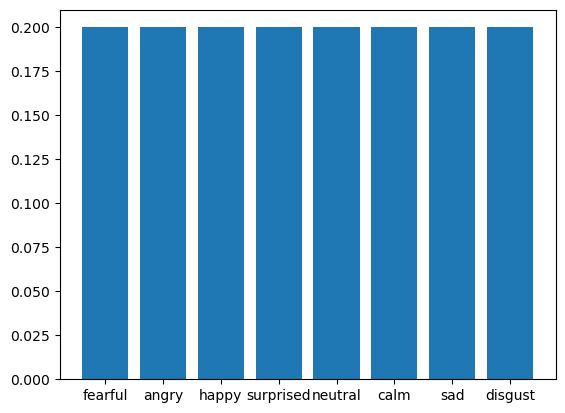

In [ ]:
width = 0.2

fig,ax = plt.subplots()
ax.bar(df['emotion'], width)
plt.show()

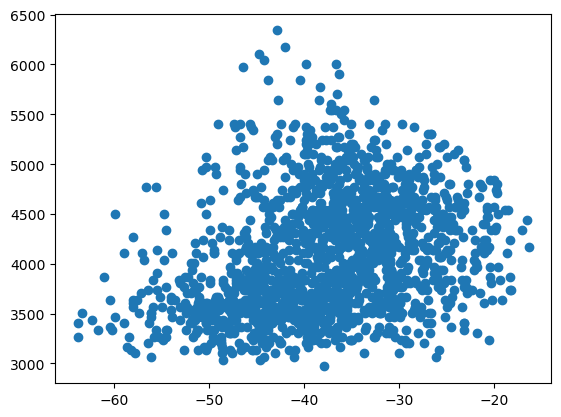

In [ ]:
plt.scatter(df['intensity'], df['length_ms'])

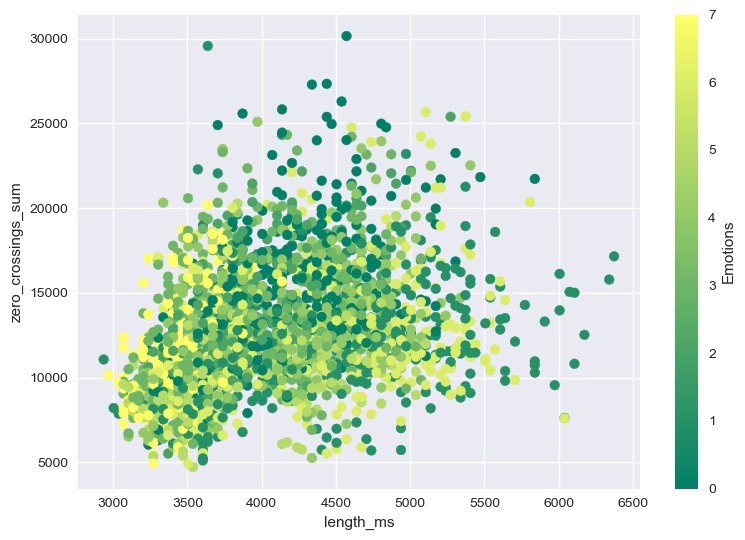

In [ ]:
emotion_locs = sorted(df['emotion'].unique())
emotion_mapping = dict(zip(emotion_locs, range(0, len(emotion_locs) + 1)))
df['emotion_val'] = df['emotion'].map(emotion_mapping).astype(int)

plt.style.use('seaborn')

# plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(df['length_ms'], df['zero_crossings_sum'], c=df['emotion_val'], cmap='summer')
cbar = plt.colorbar()
cbar.set_label("Emotions")

plt.xlabel('length_ms')
plt.ylabel('zero_crossings_sum')

plt.tight_layout()
plt.show()

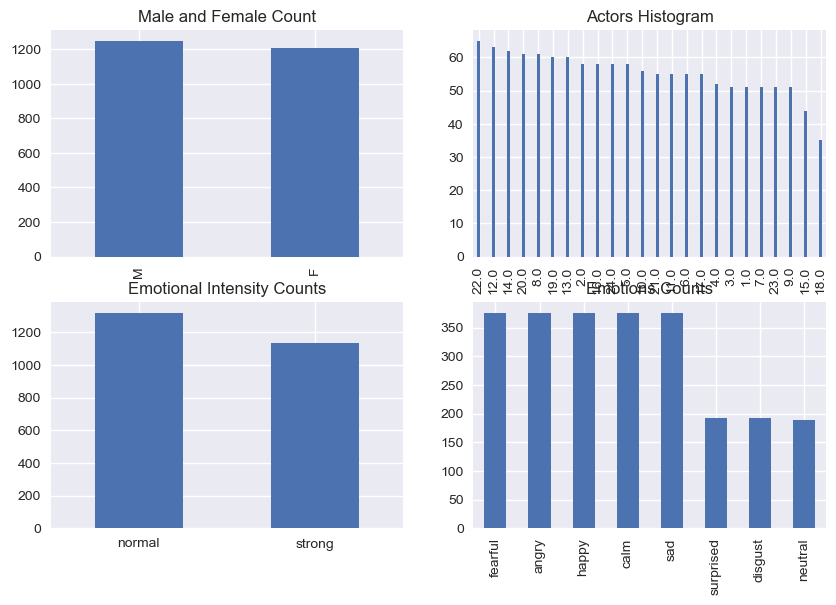

In [ ]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10))
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df['sex'].value_counts().plot(kind='bar',
                                   title='Male and Female Count')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (1, 1))
df['emotion'].value_counts().plot(kind='bar', title='Emotions Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df['emotional_intensity'].value_counts().plot(kind='bar', title='Emotional Intensity Counts')
plt.xticks(rotation=0)

# Plot the Age histogram
plt.subplot2grid(fig_dims, (0, 1))
df['actor'].value_counts().plot(kind='bar', title='Actors Histogram', width=0.2)
# df['actor'].hist()
# plt.title('Actor Histogram')

plt.show()

## Visualizing Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2256 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                1326 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   sample_width         2452 non-null   int64  
 9   frame_rate           2452 non-null   int64  
 10  frame_width          2452 non-null   int64  
 11  length_ms            2452 non-null   int64  
 12  frame_count          2452 non-null   int64  
 13  intensity            1636 non-null   float64
 14  zero_crossings_sum   2452 non-null   int64  
 15  mfcc_mean            2452 non-null   f

<AxesSubplot:>

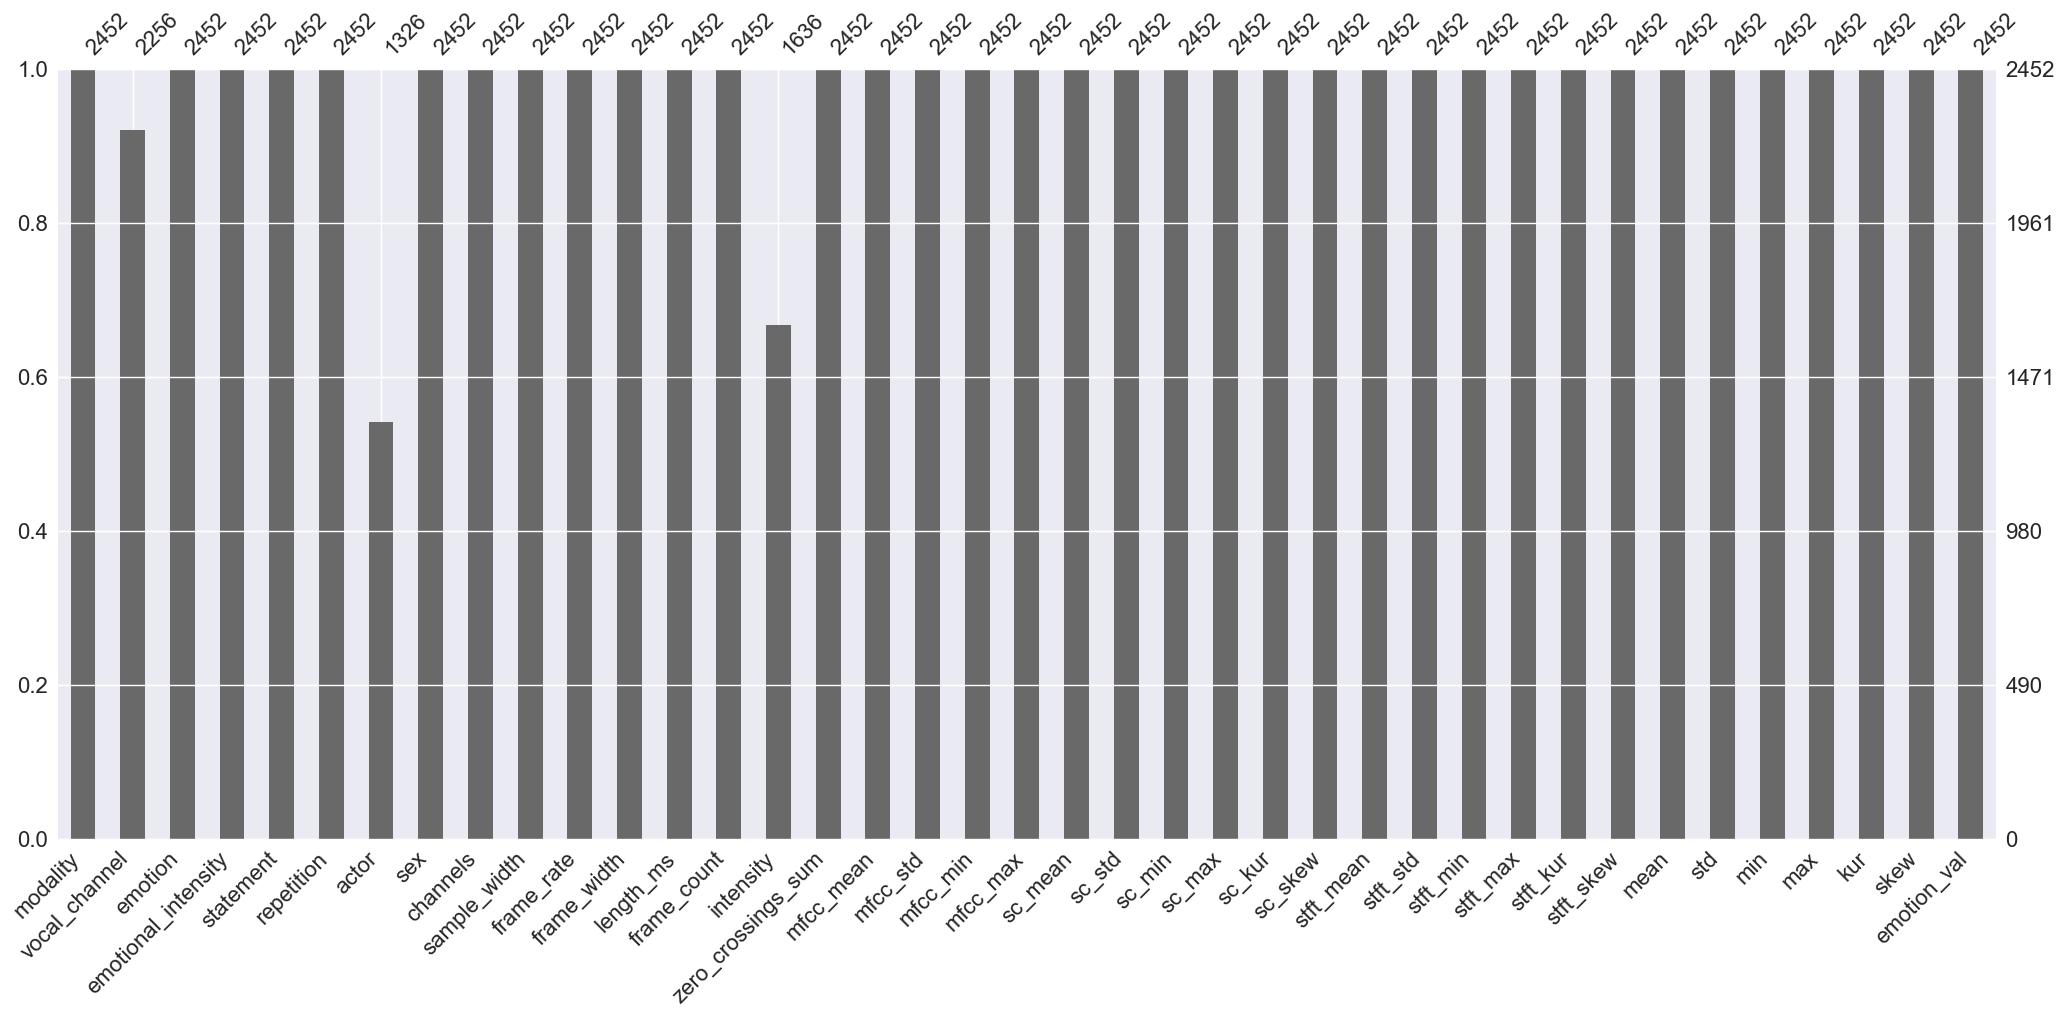

In [ ]:
msno.bar(df)

<AxesSubplot:>

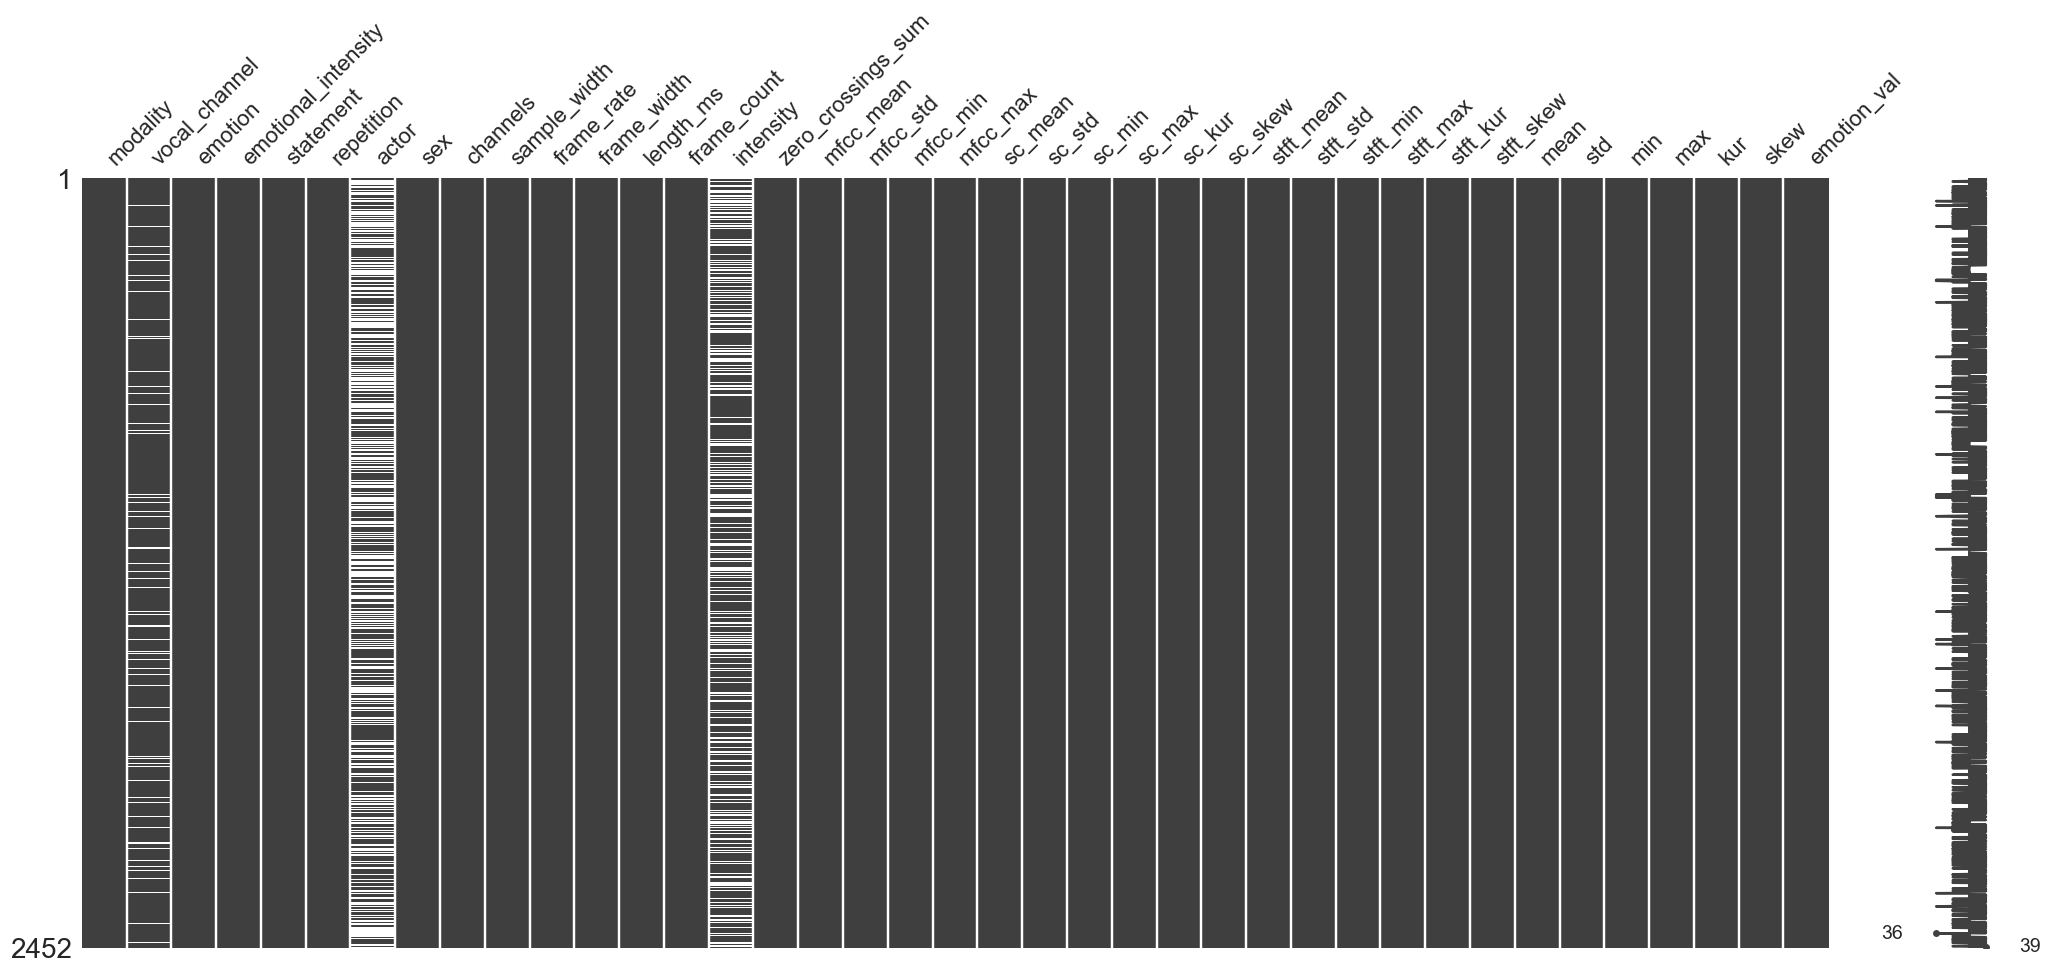

In [ ]:
msno.matrix(df)

<AxesSubplot:>

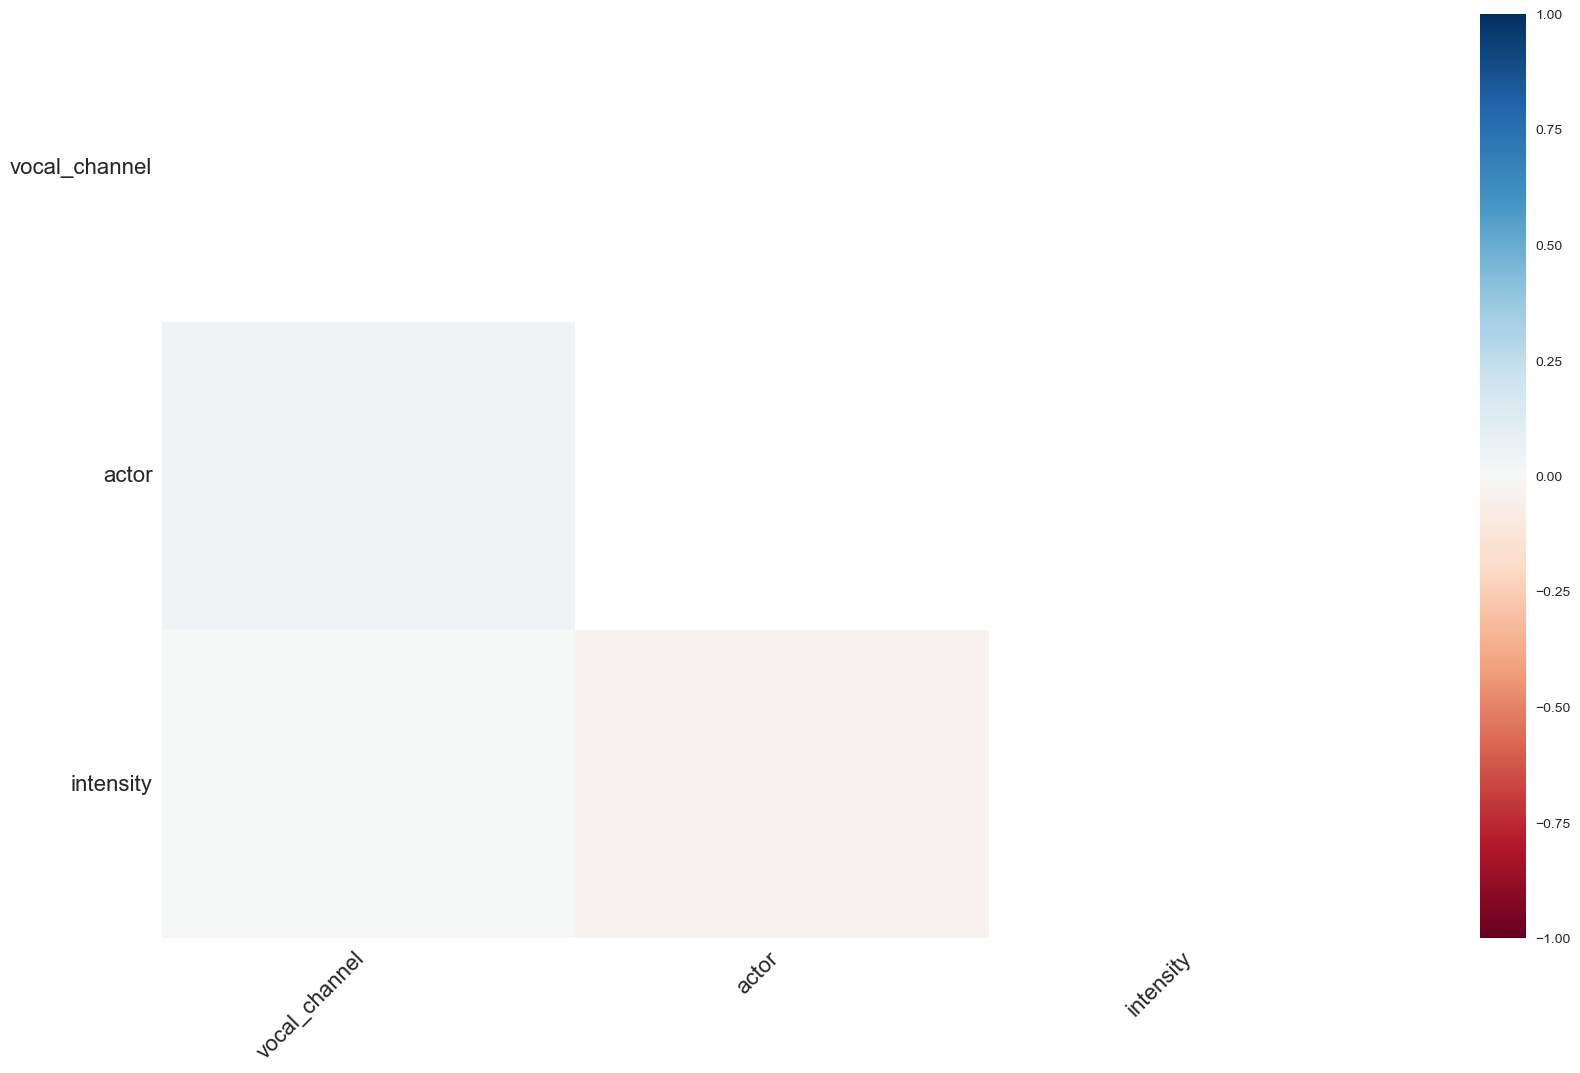

In [ ]:
msno.heatmap(df)

In [ ]:
df.isnull().any()

modality               False
vocal_channel           True
emotion                False
emotional_intensity    False
statement              False
repetition             False
actor                   True
sex                    False
channels               False
sample_width           False
frame_rate             False
frame_width            False
length_ms              False
frame_count            False
intensity               True
zero_crossings_sum     False
mfcc_mean              False
mfcc_std               False
mfcc_min               False
mfcc_max               False
sc_mean                False
sc_std                 False
sc_min                 False
sc_max                 False
sc_kur                 False
sc_skew                False
stft_mean              False
stft_std               False
stft_min               False
stft_max               False
stft_kur               False
stft_skew              False
mean                   False
std                    False
min           

In [ ]:
df.isnull().sum()

modality                  0
vocal_channel           196
emotion                   0
emotional_intensity       0
statement                 0
repetition                0
actor                  1126
sex                       0
channels                  0
sample_width              0
frame_rate                0
frame_width               0
length_ms                 0
frame_count               0
intensity               816
zero_crossings_sum        0
mfcc_mean                 0
mfcc_std                  0
mfcc_min                  0
mfcc_max                  0
sc_mean                   0
sc_std                    0
sc_min                    0
sc_max                    0
sc_kur                    0
sc_skew                   0
stft_mean                 0
stft_std                  0
stft_min                  0
stft_max                  0
stft_kur                  0
stft_skew                 0
mean                      0
std                       0
min                       0
max                 

## Checking Correlation among Variables

In [ ]:
df['intensity'].corr(df['length_ms'])

0.29378232122356507

In [ ]:
df.corr()

actor  channels  sample_width  frame_rate  frame_width  \
actor               1.000000 -0.021199           NaN         NaN    -0.021199   
channels           -0.021199  1.000000           NaN         NaN     1.000000   
sample_width             NaN       NaN           NaN         NaN          NaN   
frame_rate               NaN       NaN           NaN         NaN          NaN   
frame_width        -0.021199  1.000000           NaN         NaN     1.000000   
length_ms           0.043038 -0.011438           NaN         NaN    -0.011438   
frame_count         0.039325 -0.005109           NaN         NaN    -0.005109   
intensity           0.061923 -0.058387           NaN         NaN    -0.058387   
zero_crossings_sum -0.059671 -0.039588           NaN         NaN    -0.039588   
mfcc_mean          -0.065308 -0.058672           NaN         NaN    -0.058672   
mfcc_std           -0.012426  0.055940           NaN         NaN     0.055940   
mfcc_min            0.045965 -0.045564           NaN         NaN    -0.045564   
mfcc_max           -0.028036  0.025047           NaN         NaN     0.025047   
sc_mean             0.060292  0.056692           NaN         NaN     0.056692   
sc_std              0.119453  0.062773           NaN         NaN     0.062773   
sc_min             -0.046160 -0.038106           NaN         NaN    -0.038106   
sc_max              0.083882  0.017277           NaN         NaN     0.017277   
sc_kur             -0.132716 -0.041518           NaN         NaN    -0.041518   
sc_skew            -0.066964 -0.048661           NaN         NaN    -0.048661   
stft_mean          -0.039657  0.025579           NaN         NaN     0.025579   
stft_std            0.082993 -0.015658           NaN         NaN    -0.015658   
stft_min            0.027860 -0.007655           NaN         NaN    -0.007655   
stft_max                 NaN       NaN           NaN         NaN          NaN   
stft_kur           -0.064000  0.009364           NaN         NaN     0.009364   
stft_skew           0.007862 -0.030689           NaN         NaN    -0.030689   
mean                0.020220  0.000447           NaN         NaN     0.000447   
std                 0.032818 -0.034657           NaN         NaN    -0.034657   
min                -0.009776  0.034420           NaN         NaN     0.034420   
max                 0.015928 -0.032340           NaN         NaN    -0.032340   
kur                -0.023939  0.024764           NaN         NaN     0.024764   
skew                0.065606  0.022957           NaN         NaN     0.022957   

                    length_ms  frame_count  intensity  zero_crossings_sum  \
actor                0.043038     0.039325   0.061923           -0.059671   
channels            -0.011438    -0.005109  -0.058387           -0.039588   
sample_width              NaN          NaN        NaN                 NaN   
frame_rate                NaN          NaN        NaN                 NaN   
frame_width         -0.011438    -0.005109  -0.058387           -0.039588   
length_ms            1.000000     0.762874   0.293782            0.329517   
frame_count          0.762874     1.000000   0.215516            0.232289   
intensity            0.293782     0.215516   1.000000            0.497906   
zero_crossings_sum   0.329517     0.232289   0.497906            1.000000   
mfcc_mean            0.011321     0.002837   0.610094            0.130454   
mfcc_std            -0.302735    -0.226994  -0.978744           -0.559115   
mfcc_min             0.205996     0.151464   0.973981            0.500559   
mfcc_max            -0.347253    -0.271507  -0.386237           -0.448745   
sc_mean             -0.546234    -0.421151  -0.333510           -0.072949   
sc_std              -0.182306    -0.140110  -0.440724           -0.373711   
sc_min              -0.077001    -0.063856   0.110529            0.190178   
sc_max              -0.118781    -0.107906  -0.223566           -0.040921   
sc_kur               0.292127     0.231393  

In [ ]:
# lets include also the Sex variable
sex_map = {"M": 0, "F": 1}
df.replace({"sex": sex_map}).corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
df[df['sex'] == "F"]['emotional_intensity']

0       normal
1       normal
2       strong
3       normal
4       strong
         ...  
2382    strong
2383    strong
2384    strong
2385    normal
2386    normal
Name: emotional_intensity, Length: 1204, dtype: object

In [ ]:
df[df['actor'] == 5]['sex']

145     M
146     M
152     M
153     M
183     M
184     M
186     M
201     M
205     M
416     M
433     M
435     M
438     M
462     M
465     M
467     M
487     M
736     M
739     M
763     M
777     M
796     M
1066    M
1067    M
1121    M
1122    M
1248    M
1250    M
1288    M
1292    M
1306    M
1309    M
1311    M
1503    M
1513    M
1748    M
1751    M
1753    M
1769    M
1770    M
1772    M
1802    M
1809    M
1811    M
2058    M
2081    M
2116    M
2119    M
2173    M
2179    M
2210    M
2211    M
2214    M
2229    M
2232    M
2234    M
2428    M
2434    M
Name: sex, dtype: object

## Filtering

In [ ]:
df[(df["emotional_intensity"] == "strong")]

modality vocal_channel    emotion emotional_intensity  \
2     audio-only           NaN      happy              strong   
4     audio-only          song      happy              strong   
9     audio-only          song        sad              strong   
10    audio-only          song        sad              strong   
13    audio-only           NaN       calm              strong   
...          ...           ...        ...                 ...   
2441  audio-only          song        sad              strong   
2442  audio-only          song        sad              strong   
2445  audio-only        speech  surprised              strong   
2447  audio-only        speech       calm              strong   
2449  audio-only          song        sad              strong   

                         statement repetition  actor sex  channels  \
2     Dogs are sitting by the door        2nd   16.0   F         1   
4     Dogs are sitting by the door        2nd    2.0   F         1   
9     Dogs are sitting by the door        2nd   12.0   F         1   
10    Dogs are sitting by the door        2nd   -1.0   F         1   
13    Kids are talking by the door        1st    6.0   F         1   
...                            ...        ...    ...  ..       ...   
2441  Kids are talking by the door        2nd   17.0   M         1   
2442  Kids are talking by the door        2nd   -1.0   M         1   
2445  Dogs are sitting by the door        1st   -1.0   M         1   
2447  Kids are talking by the door        1st   23.0   M         1   
2449  Dogs are sitting by the door        2nd   23.0   M         1   

      sample_width  ...  stft_min  stft_max  stft_kur  stft_skew  \
2                2  ...  0.000000       1.0 -1.242947   0.470350   
4                2  ...  0.000000       1.0 -1.366742   0.318926   
9                2  ...  0.000185       1.0 -1.544716  -0.141990   
10               2  ...  0.000259       1.0 -0.933644   0.663639   
13               2  ...  0.000000       1.0 -1.259394   0.083318   
...            ...  ...       ...       ...       ...        ...   
2441             2  ...  0.005052       1.0 -1.407997   0.093645   
2442             2  ...  0.002490       1.0 -1.323040   0.333878   
2445             2  ...  0.000314       1.0 -1.256183  -0.240707   
2447             2  ...  0.000000       1.0 -1.075888  -0.310088   
2449             2  ...  0.000000       1.0 -1.473789   0.130310   

              mean       std       min       max        kur      skew  
2     2.429985e-06  0.024317 -0.137482  0.166351   4.881241  0.302659  
4     8.454691e-07  0.027522 -0.192169  0.242676   7.485109  0.414872  
9     2.485711e-05  0.039338 -0.286011  0.331696  11.379089  0.475098  
10    2.442117e-06  0.016677 -0.173859  0.146240  12.331683 -0.321409  
13    2.399588e-06  0.001859 -0.027374  0.023895  22.183236 -0.901413  
...            ...       ...       ...       ...        ...       ...  
2441  5.389515e-06  0.046427 -0.376434  0.380524  10.848378 -0.323654  
2442 -4.840809e-05  0.033465 -0.225037  0.282410   6.857340 -0.002707  
2445  3.096644e-05  0.009144 -0.100067  0.124420  23.292300  0.226566  
2447  9.367040e-07  0.005260 -0.039856  0.052399   9.551363  0.759247  
2449 -8.219263e-06  0.015384 -0.093079  0.097260   4.964319 -0.005821  

[1132 rows x 38 columns]

In [ ]:
df[(df["emotional_intensity"] == "strong") & (df["sex"] ==  "F")]

modality vocal_channel  emotion emotional_intensity  \
2     audio-only           NaN    happy              strong   
4     audio-only          song    happy              strong   
9     audio-only          song      sad              strong   
10    audio-only          song      sad              strong   
13    audio-only           NaN     calm              strong   
...          ...           ...      ...                 ...   
2376  audio-only        speech    happy              strong   
2381  audio-only        speech      sad              strong   
2382  audio-only        speech  disgust              strong   
2383  audio-only        speech      sad              strong   
2384  audio-only        speech  disgust              strong   

                         statement repetition  actor sex  channels  \
2     Dogs are sitting by the door        2nd   16.0   F         1   
4     Dogs are sitting by the door        2nd    2.0   F         1   
9     Dogs are sitting by the door        2nd   12.0   F         1   
10    Dogs are sitting by the door        2nd   -1.0   F         1   
13    Kids are talking by the door        1st    6.0   F         1   
...                            ...        ...    ...  ..       ...   
2376  Kids are talking by the door        2nd   16.0   F         1   
2381  Kids are talking by the door        2nd    6.0   F         1   
2382  Kids are talking by the door        1st   -1.0   F         1   
2383  Kids are talking by the door        2nd   12.0   F         1   
2384  Kids are talking by the door        1st   -1.0   F         1   

      sample_width  ...  stft_min  stft_max  stft_kur  stft_skew  \
2                2  ...  0.000000       1.0 -1.242947   0.470350   
4                2  ...  0.000000       1.0 -1.366742   0.318926   
9                2  ...  0.000185       1.0 -1.544716  -0.141990   
10               2  ...  0.000259       1.0 -0.933644   0.663639   
13               2  ...  0.000000       1.0 -1.259394   0.083318   
...            ...  ...       ...       ...       ...        ...   
2376             2  ...  0.000310       1.0 -1.294222  -0.035715   
2381             2  ...  0.000000       1.0 -1.468108   0.070382   
2382             2  ...  0.000000       1.0 -1.268641   0.074210   
2383             2  ...  0.000343       1.0 -1.194538   0.310484   
2384             2  ...  0.000000       1.0 -1.258331   0.349367   

              mean       std       min       max        kur      skew  
2     2.429985e-06  0.024317 -0.137482  0.166351   4.881241  0.302659  
4     8.454691e-07  0.027522 -0.192169  0.242676   7.485109  0.414872  
9     2.485711e-05  0.039338 -0.286011  0.331696  11.379089  0.475098  
10    2.442117e-06  0.016677 -0.173859  0.146240  12.331683 -0.321409  
13    2.399588e-06  0.001859 -0.027374  0.023895  22.183236 -0.901413  
...            ...       ...       ...       ...        ...       ...  
2376  5.598804e-07  0.036163 -0.331604  0.407562  22.405898  0.344928  
2381 -3.490830e-06  0.002025 -0.020294  0.019684  21.865192 -0.338592  
2382 -1.930000e-05  0.011004 -0.087341  0.081970   8.308136 -0.015323  
2383  1.541991e-05  0.032081 -0.242645  0.277985  10.126588  0.171287  
2384  1.427306e-06  0.011729 -0.097656  0.103241  11.108656  0.363515  

[556 rows x 38 columns]

In [ ]:
df['actor'].max()

24.0

## Interesting Plots

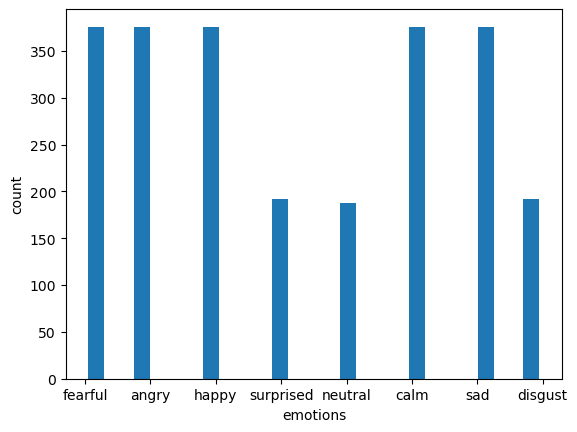

In [ ]:
colors = ['green', 'blue', 'lime']
n_bins = 20
plt.hist(df['emotion'], n_bins, rwidth=0.7, histtype ='bar')
plt.xlabel("emotions")
plt.ylabel("count")
plt.show()

<AxesSubplot:xlabel='emotion', ylabel='actor'>

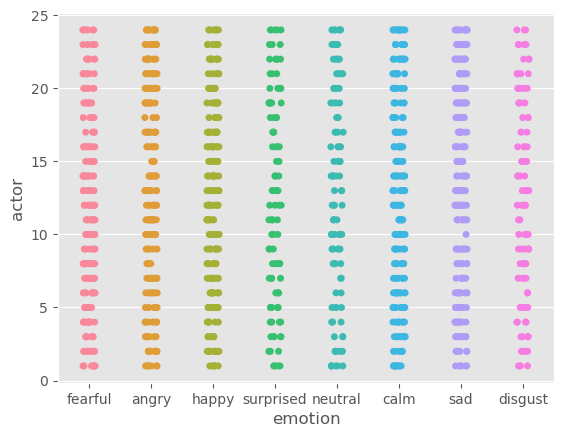

In [ ]:
sns.stripplot(data=df, x="emotion", y="actor")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


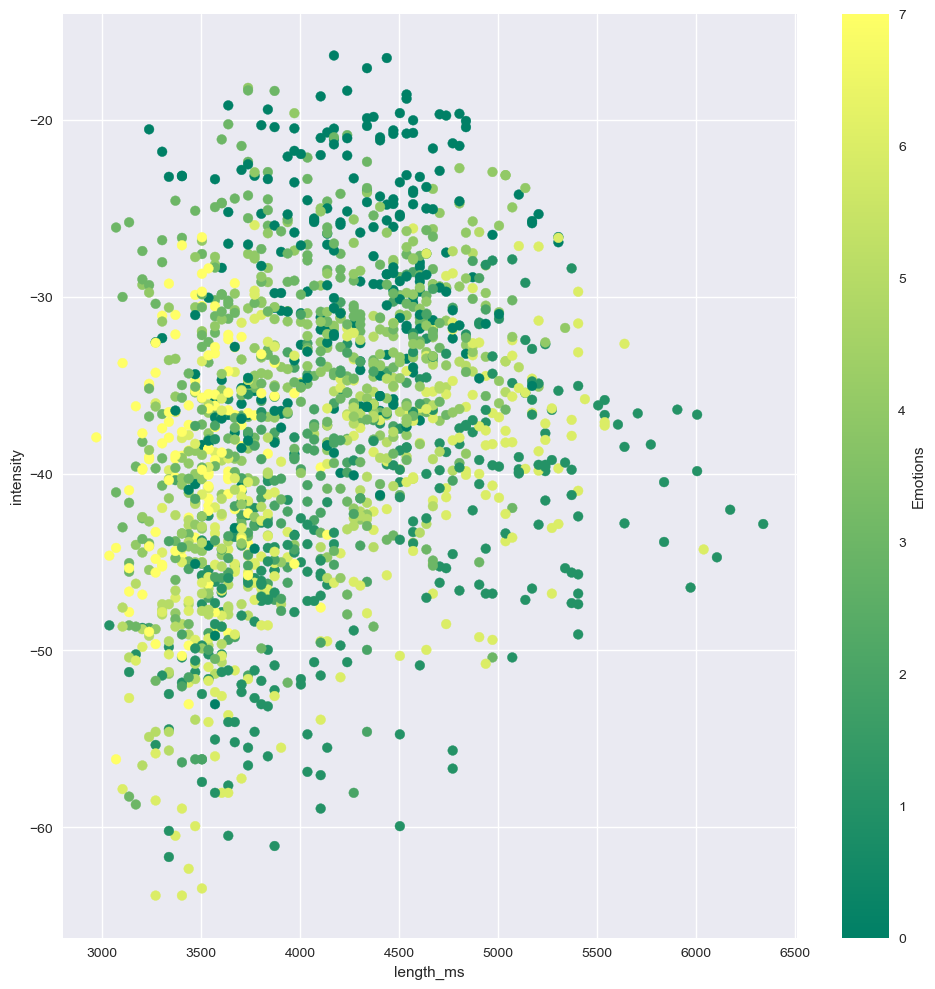

In [ ]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10))
# fig_dims = (3, 2)
plt.style.use('seaborn')

# plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(df['length_ms'], df['intensity'], c=df['emotion_val'], cmap='summer')
cbar = plt.colorbar()
cbar.set_label("Emotions")

plt.xlabel('length_ms')
plt.ylabel('intensity')
plt.legend()

plt.tight_layout()
plt.show()

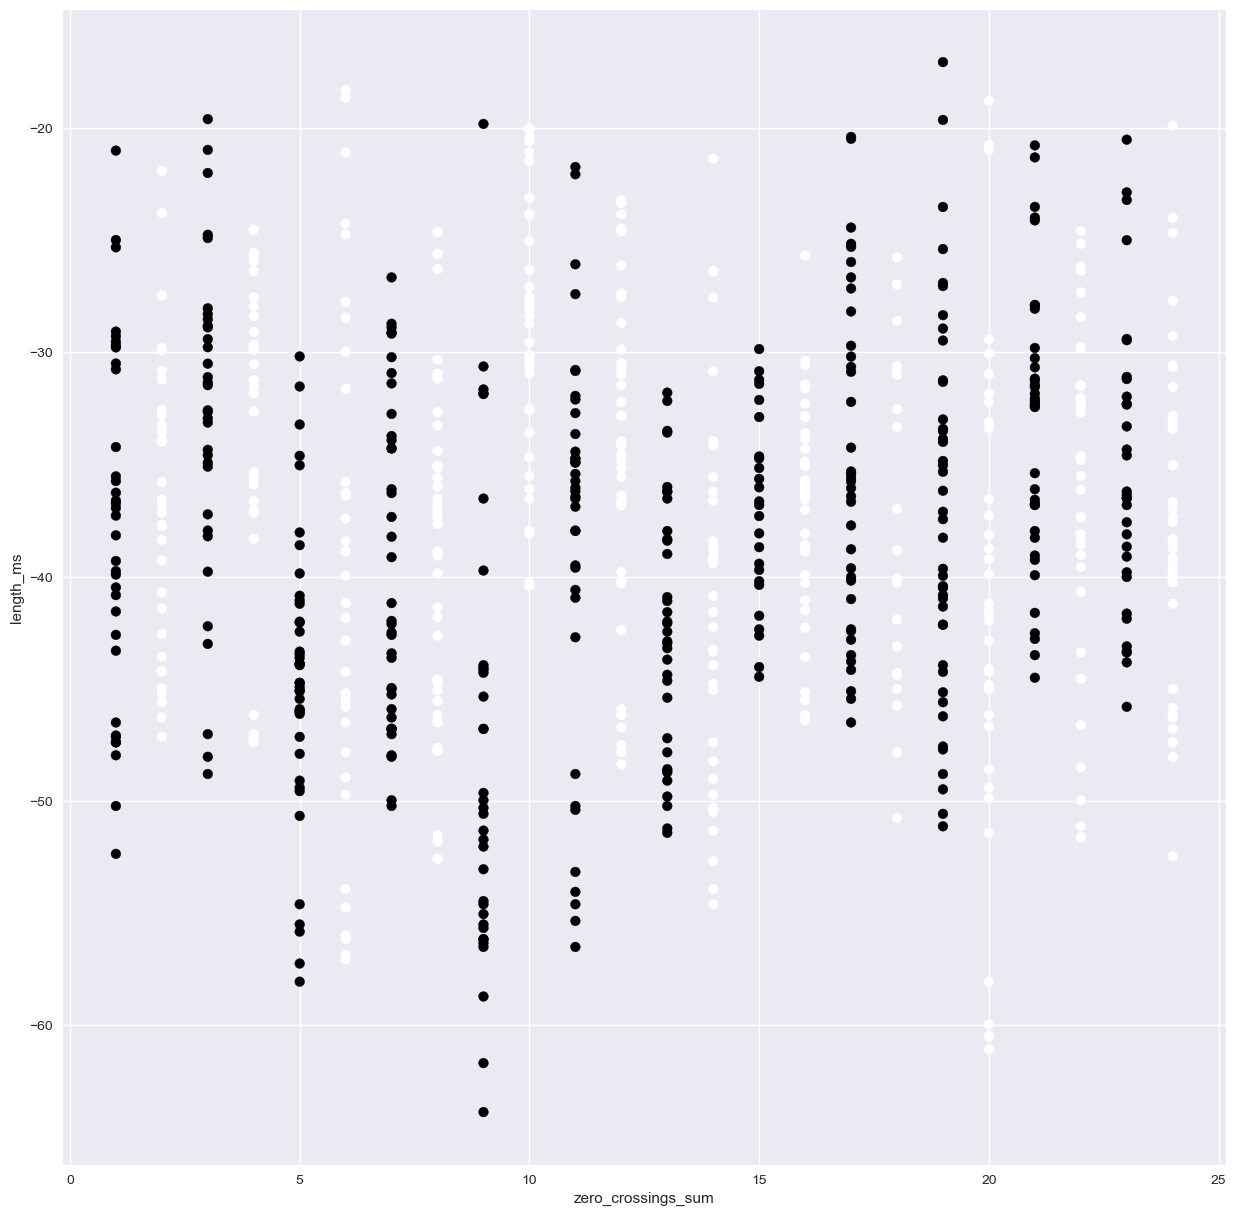

In [ ]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15))
# fig_dims = (3, 2)
plt.style.use('seaborn')

# plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(df['actor'], df['intensity'], c=df['sex_val'])


plt.xlabel('zero_crossings_sum')
plt.ylabel('length_ms')

plt.show()

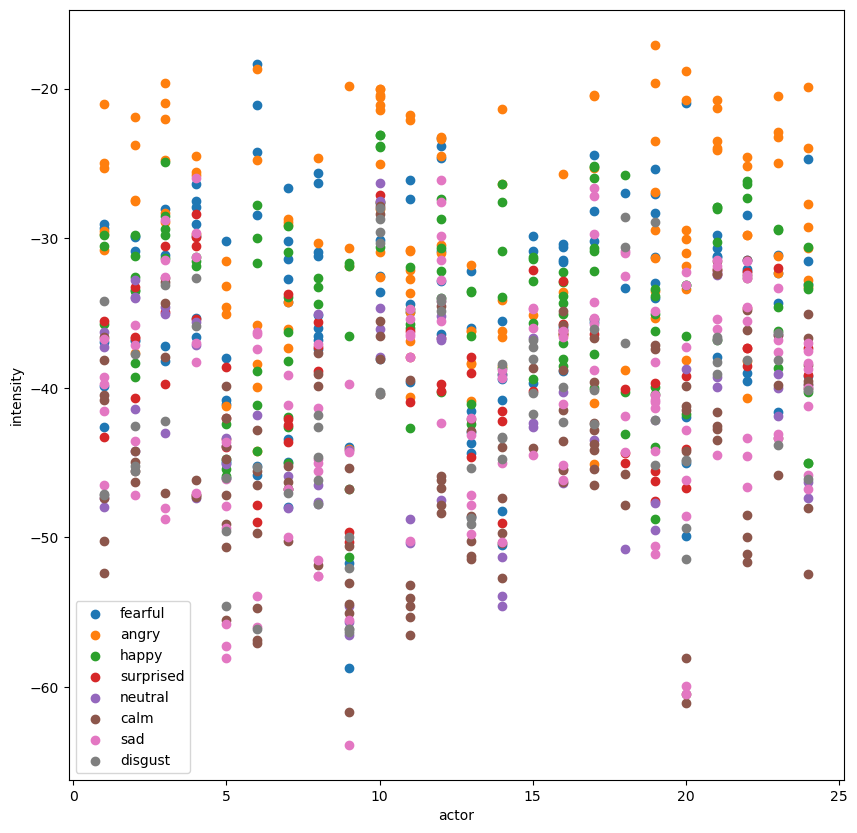

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df[df['emotion'] == "fearful"]['actor'],
            df[df['emotion'] == "fearful"]['intensity'], label='fearful')
plt.scatter(df[df['emotion'] == "angry"]['actor'],
            df[df['emotion'] == "angry"]['intensity'],label='angry')
plt.scatter(df[df['emotion'] == "happy"]['actor'],
            df[df['emotion'] == "happy"]['intensity'],label='happy')
plt.scatter(df[df['emotion'] == "surprised"]['actor'],
            df[df['emotion'] == "surprised"]['intensity'],label='surprised')
plt.scatter(df[df['emotion'] == "neutral"]['actor'],
            df[df['emotion'] == "neutral"]['intensity'],label='neutral')
plt.scatter(df[df['emotion'] == "calm"]['actor'],
            df[df['emotion'] == "calm"]['intensity'],label='calm')
plt.scatter(df[df['emotion'] == "sad"]['actor'],
            df[df['emotion'] == "sad"]['intensity'],label='sad')
plt.scatter(df[df['emotion'] == "disgust"]['actor'],
            df[df['emotion'] == "disgust"]['intensity'],label='disgust')
plt.xlabel('actor')
plt.ylabel('intensity')
plt.legend()
plt.show()

<AxesSubplot:xlabel='emotion', ylabel='intensity'>

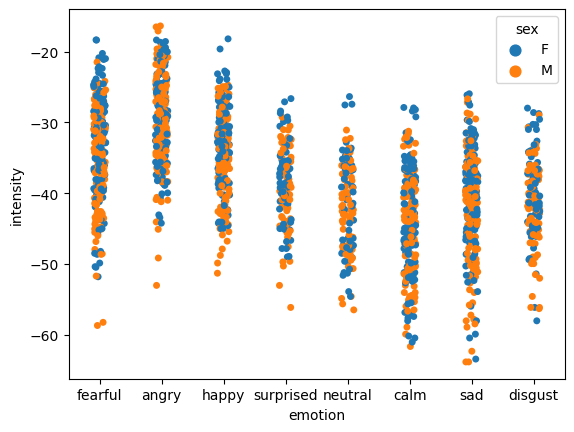

In [ ]:
sns.stripplot(data=df, x="emotion", y="intensity", hue="sex")

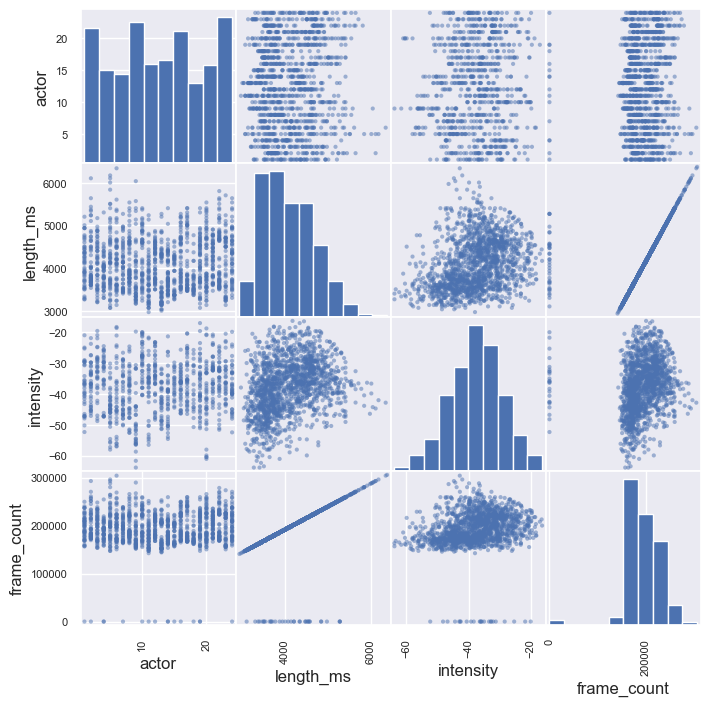

In [ ]:
pd.plotting.scatter_matrix(df[['actor', 'length_ms', 'intensity', 'frame_count']], figsize=(8, 8))
plt.show()

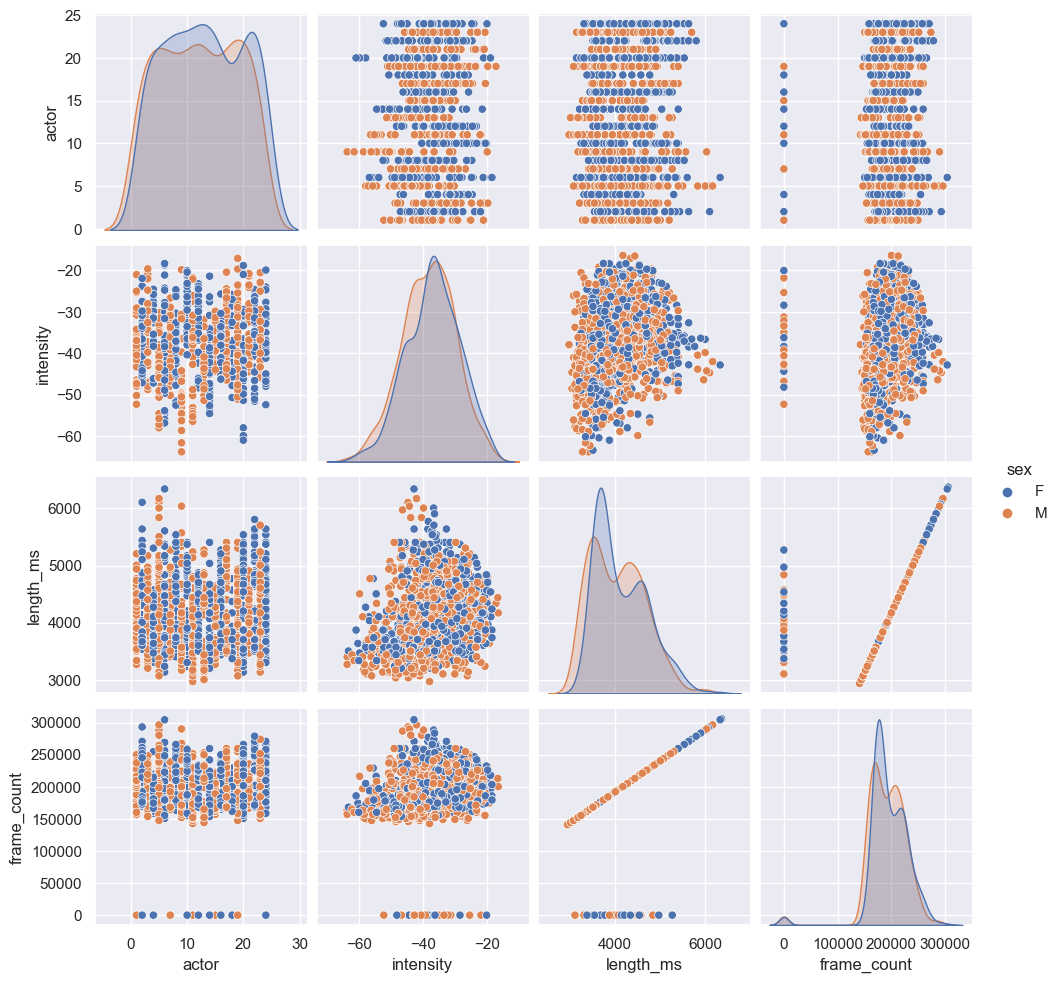

In [ ]:
sns.pairplot(df[['actor', 'intensity', 'length_ms', 'frame_count', "sex"]], hue="sex", diag_kind="kde")
plt.show()

<AxesSubplot:xlabel='emotion', ylabel='Count'>

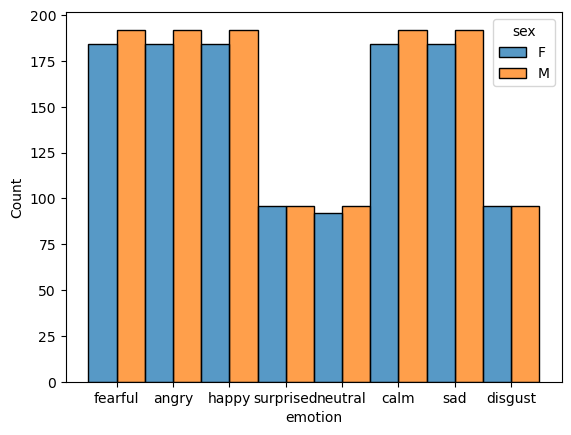

In [ ]:
sns.histplot(data=df, x="emotion", hue="sex", bins=8, multiple="dodge")

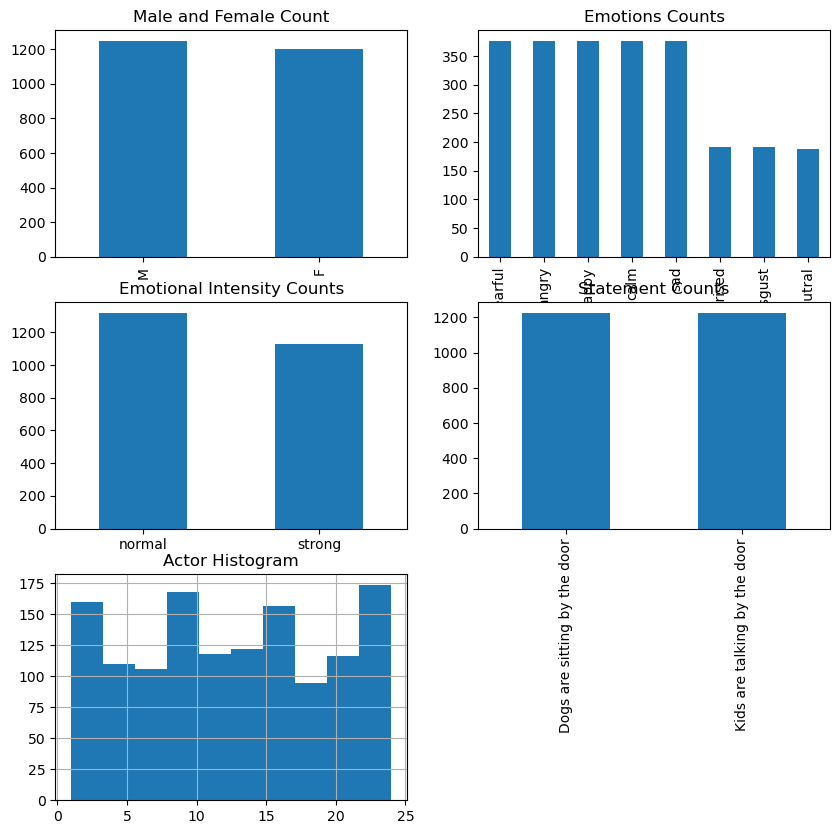

In [ ]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10))
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df['sex'].value_counts().plot(kind='bar',
                                   title='Male and Female Count')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df['emotion'].value_counts().plot(kind='bar', title='Emotions Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df['emotional_intensity'].value_counts().plot(kind='bar', title='Emotional Intensity Counts')
plt.xticks(rotation=0)

# Plot the Age histogram
plt.subplot2grid(fig_dims, (1, 1))
df['actor'].hist()
plt.title('Actor Histogram')

plt.show()

In [ ]:
emotion_xt = pd.crosstab(df['emotion'], df['sex'])
emotion_xt

sex          F    M
emotion            
angry      184  192
calm       184  192
disgust     96   96
fearful    184  192
happy      184  192
neutral     92   96
sad        184  192
surprised   96   96

In [ ]:
# Normalize the cross tab to sum to 1:
emotion_xt_pct = emotion_xt.div(pclass_xt.sum(1).astype(float), axis=0)
emotion_xt_pct

sex               F         M
emotion                      
angry      0.489362  0.510638
calm       0.489362  0.510638
disgust    0.500000  0.500000
fearful    0.489362  0.510638
happy      0.489362  0.510638
neutral    0.489362  0.510638
sad        0.489362  0.510638
surprised  0.500000  0.500000

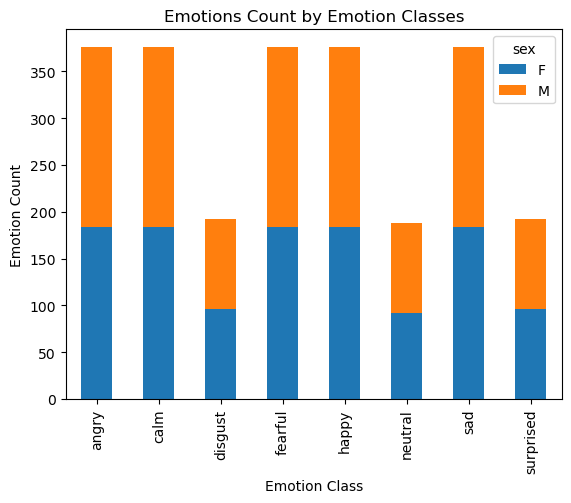

In [ ]:
emotion_xt.plot(kind='bar', stacked=True,
                   title='Emotions Count by Emotion Classes')
plt.xlabel('Emotion Class')
plt.ylabel('Emotion Count')
plt.show()

/var/folders/b8/0ht51ff15jdfnjptfvjnynk80000gn/T/ipykernel_1362/4283695574.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'actor'}>,
        <AxesSubplot:title={'center':'channels'}>,
        <AxesSubplot:title={'center':'sample_width'}>,
        <AxesSubplot:title={'center':'frame_rate'}>,
        <AxesSubplot:title={'center':'frame_width'}>,
        <AxesSubplot:title={'center':'length_ms'}>],
       [<AxesSubplot:title={'center':'frame_count'}>,
        <AxesSubplot:title={'center':'intensity'}>,
        <AxesSubplot:title={'center':'zero_crossings_sum'}>,
        <AxesSubplot:title={'center':'mfcc_mean'}>,
        <AxesSubplot:title={'center':'mfcc_std'}>,
        <AxesSubplot:title={'center':'mfcc_min'}>],
       [<AxesSubplot:title={'center':'mfcc_max'}>,
        <AxesSubplot:title={'center':'sc_mean'}>,
        <AxesSubplot:title={'center':'sc_std'}>,
        <AxesSubplot:title={'center':'sc_min'}>,
        <AxesSubplot:title={'center':'sc_max'}>,
        <AxesSubplot:title={'center':'sc_kur'}>],
       [<AxesSubplot:title={'center':'sc_skew'}>,
        <AxesSub

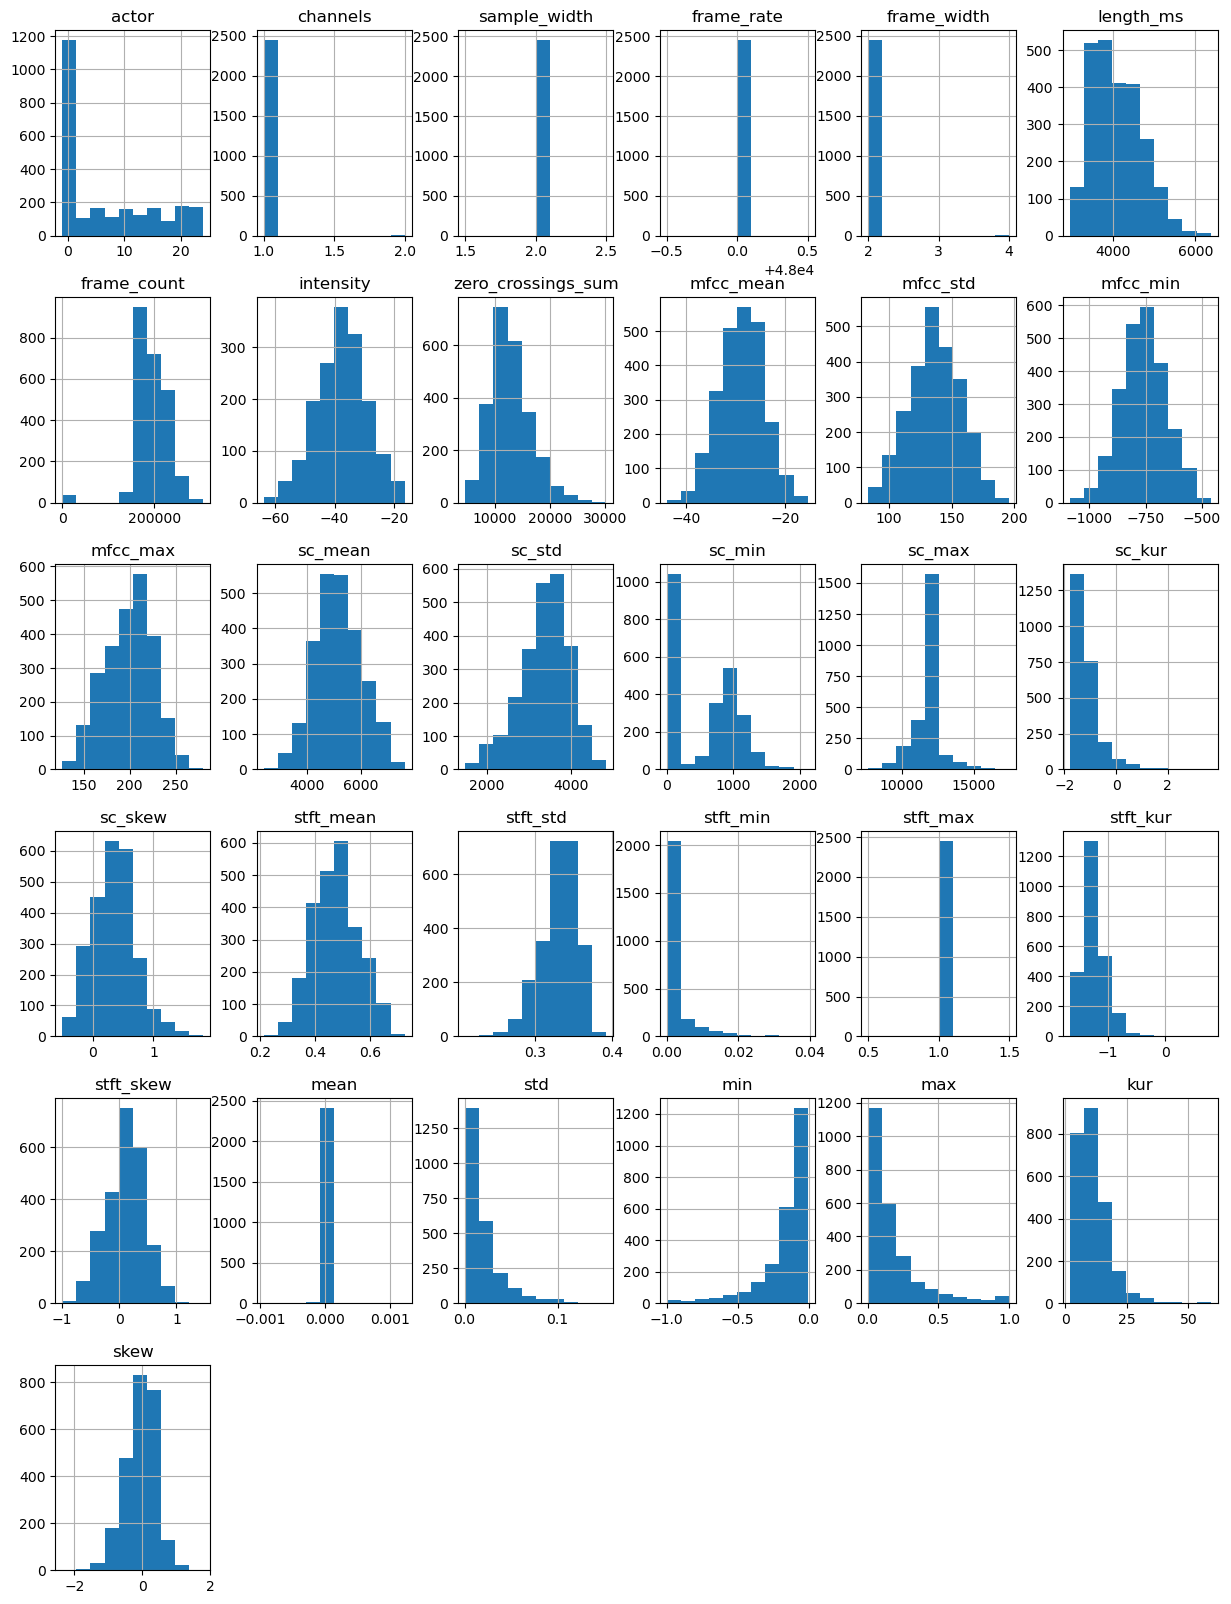

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

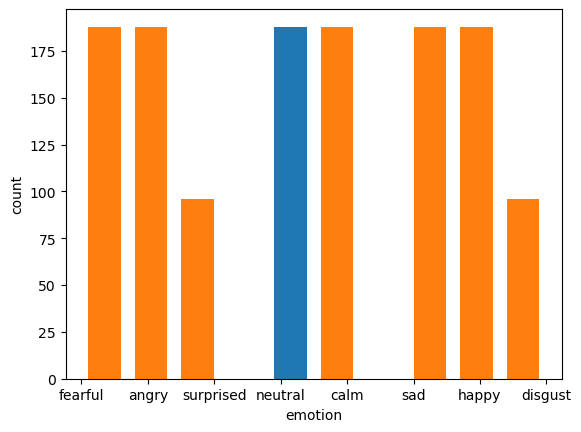

In [ ]:
plt.hist(df[df['emotional_intensity'] == 'normal']['emotion'], rwidth=0.7)
plt.hist(df[df['emotional_intensity'] == 'strong']['emotion'], rwidth=0.7)
plt.xlabel("emotion")
plt.ylabel("count")
plt.show()

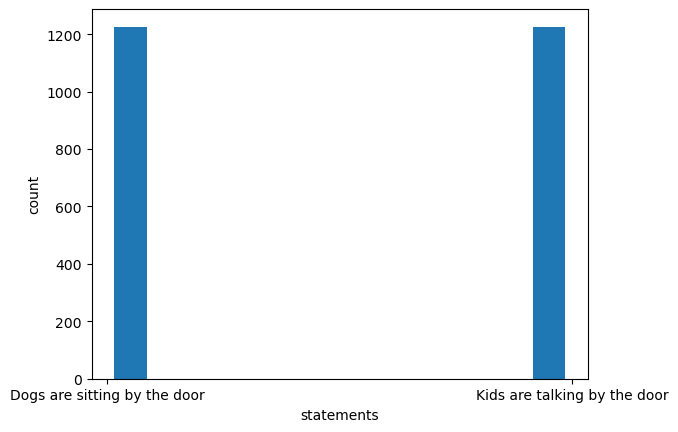

In [ ]:
plt.hist(df['statement'], rwidth=0.7, histtype ='bar')
plt.xlabel("statements")
plt.ylabel("count")
plt.show()

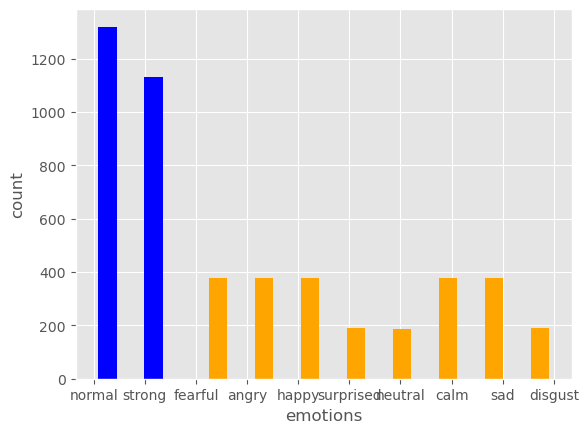

In [ ]:
style.use("ggplot")
plt.hist([df['emotional_intensity'], df['emotion']], color=["blue", "orange"])
plt.xlabel("emotions")
plt.ylabel("count")
plt.show()

/Users/mumer/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'neutral'

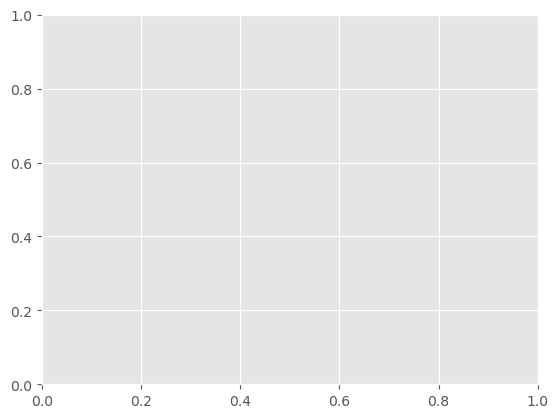

In [ ]:
sns.distplot(df.loc[df['sex'] == 'M']['emotion'])
sns.distplot(df.loc[df['sex'] == 'F']['emotion'])

<AxesSubplot:xlabel='sex', ylabel='count'>

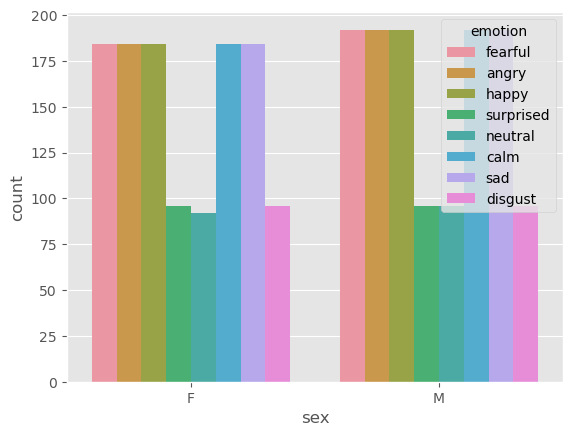

In [ ]:
sns.countplot(x='sex', hue='emotion',data=df)

<AxesSubplot:xlabel='emotion', ylabel='count'>

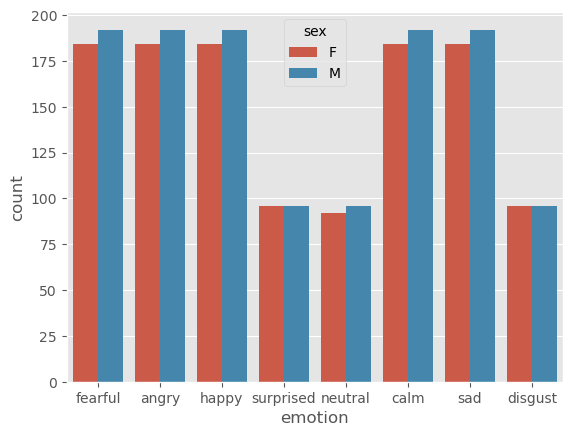

In [ ]:
sns.countplot(x='emotion', hue='sex',data=df)

<AxesSubplot:xlabel='vocal_channel', ylabel='count'>

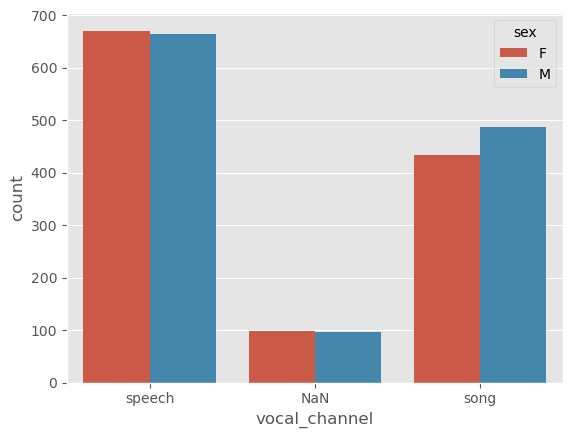

In [ ]:
sns.countplot(x='vocal_channel', hue='sex',data=df)

In [ ]:
useable_data = df.iloc[:, 2:14]
useable_data

emotion emotional_intensity                     statement repetition  \
0       fearful              normal  Dogs are sitting by the door        2nd   
1         angry              normal  Dogs are sitting by the door        1st   
2         happy              strong  Dogs are sitting by the door        2nd   
3     surprised              normal  Kids are talking by the door        1st   
4         happy              strong  Dogs are sitting by the door        2nd   
...         ...                 ...                           ...        ...   
2447       calm              strong  Kids are talking by the door        1st   
2448       calm              normal  Dogs are sitting by the door        1st   
2449        sad              strong  Dogs are sitting by the door        2nd   
2450  surprised              normal  Kids are talking by the door        1st   
2451    neutral              normal  Dogs are sitting by the door        2nd   

      actor sex  channels  sample_width  frame_rate  frame_width  length_ms  \
0       2.0   F         1             2       48000            2       3737   
1      16.0   F         1             2       48000            2       3904   
2      16.0   F         1             2       48000            2       4671   
3      14.0   F         1             2       48000            2       3637   
4       2.0   F         1             2       48000            2       4404   
...     ...  ..       ...           ...         ...          ...        ...   
2447   23.0   M         1             2       48000            2       4605   
2448   23.0   M         1             2       48000            2       4171   
2449   23.0   M         1             2       48000            2       5239   
2450   -1.0   M         1             2       48000            2       3737   
2451   23.0   M         1             2       48000            2       3837   

      frame_count  
0        179379.0  
1        187387.0  
2        224224.0  
3        174575.0  
4        211411.0  
...           ...  
2447     221021.0  
2448     200200.0  
2449     251451.0  
2450     179379.0  
2451     184184.0  

[2452 rows x 12 columns]

In [ ]:
correlation_mat = useable_data.corr()
correlation_mat

actor  channels  sample_width  frame_rate  frame_width  \
actor         1.000000  0.011633           NaN         NaN     0.011633   
channels      0.011633  1.000000           NaN         NaN     1.000000   
sample_width       NaN       NaN           NaN         NaN          NaN   
frame_rate         NaN       NaN           NaN         NaN          NaN   
frame_width   0.011633  1.000000           NaN         NaN     1.000000   
length_ms     0.032763 -0.011438           NaN         NaN    -0.011438   
frame_count   0.037998 -0.005109           NaN         NaN    -0.005109   

              length_ms  frame_count  
actor          0.032763     0.037998  
channels      -0.011438    -0.005109  
sample_width        NaN          NaN  
frame_rate          NaN          NaN  
frame_width   -0.011438    -0.005109  
length_ms      1.000000     0.762874  
frame_count    0.762874     1.000000

<AxesSubplot:>

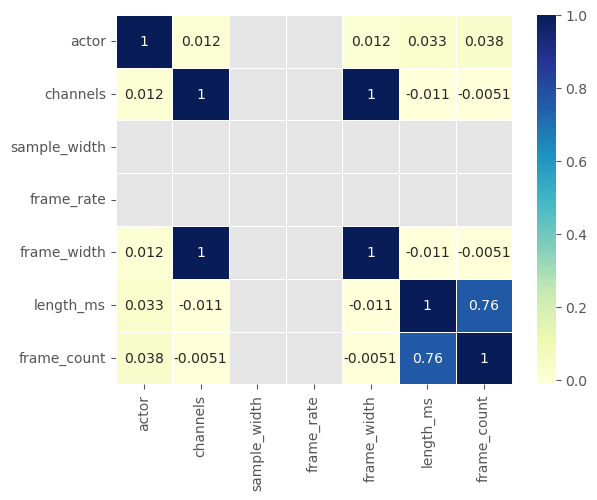

In [ ]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

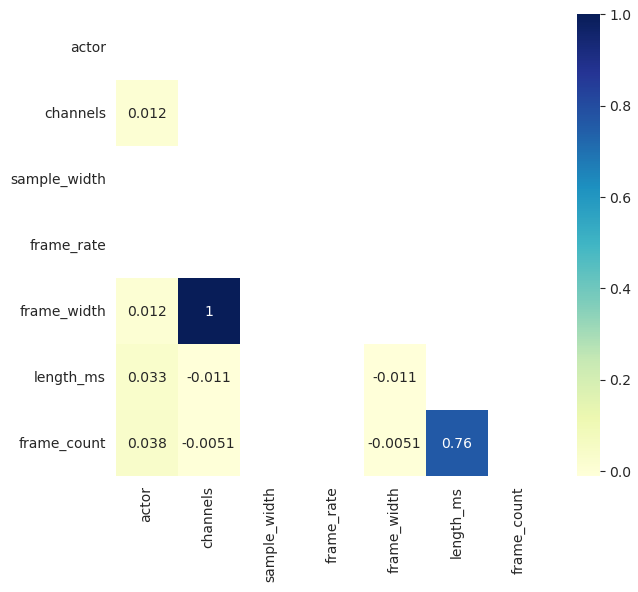

In [ ]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,6))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

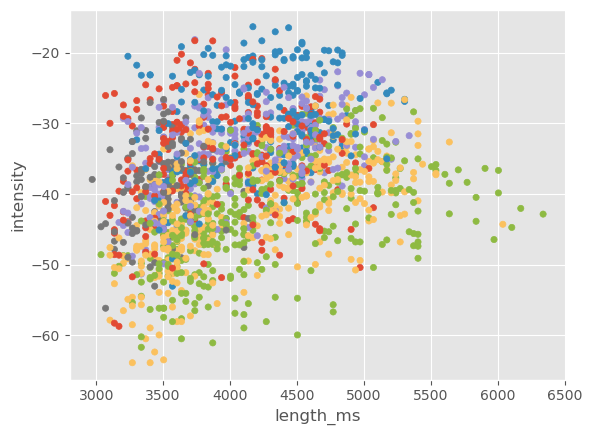

In [ ]:
x = 'length_ms'
y = 'intensity'
colors = {'fearful':'C0', 'angry':'C1', 'happy':'C2', 'surprised':'C3', 'neutral':'C4', 'calm':'C5', 'sad':'C4', 'disgust':'C5'}  # C0, C1 ... are the default plt colors
df.plot.scatter(x, y, c=df["emotion"].map(colors))
plt.show()

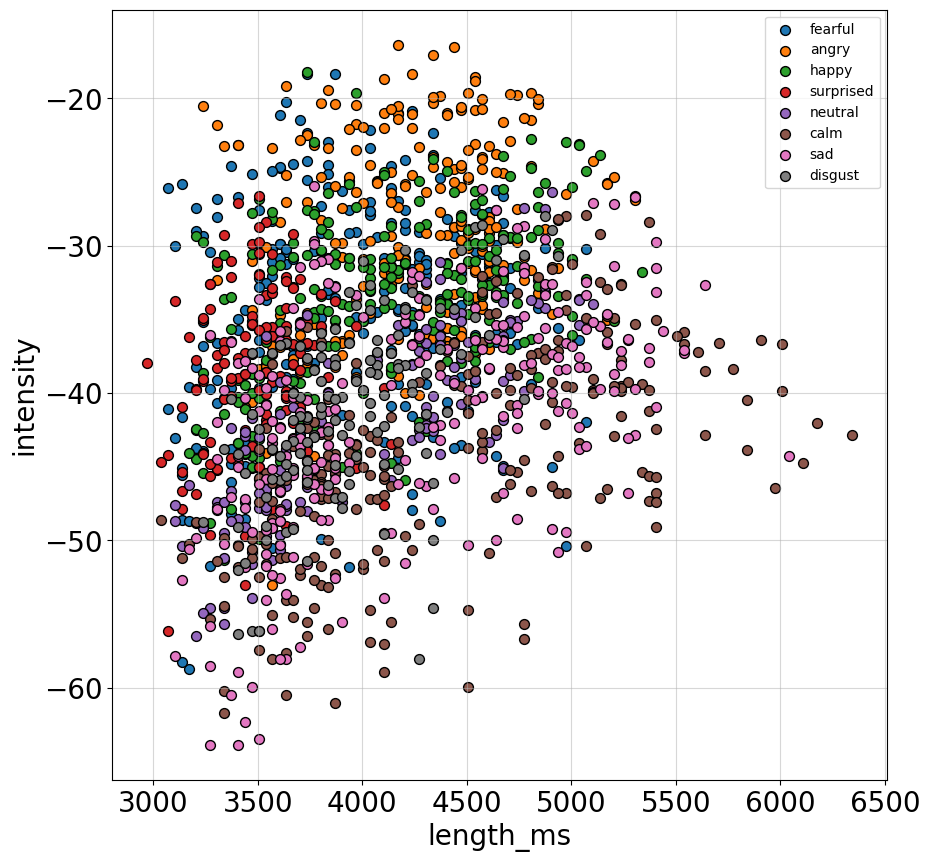

In [ ]:
plt.figure(figsize = (10,10))
x = 'length_ms'
y = 'intensity'
vals = list(df['emotion'].unique())

for val in vals:
    df_val = df[df['emotion']==val]
    plt.scatter(df_val[x], df_val[y], s=50, edgecolor='black', label=val)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(x, fontsize=20)
plt.ylabel(y, fontsize=20)

plt.grid(alpha=0.5)
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='length_ms', ylabel='intensity'>

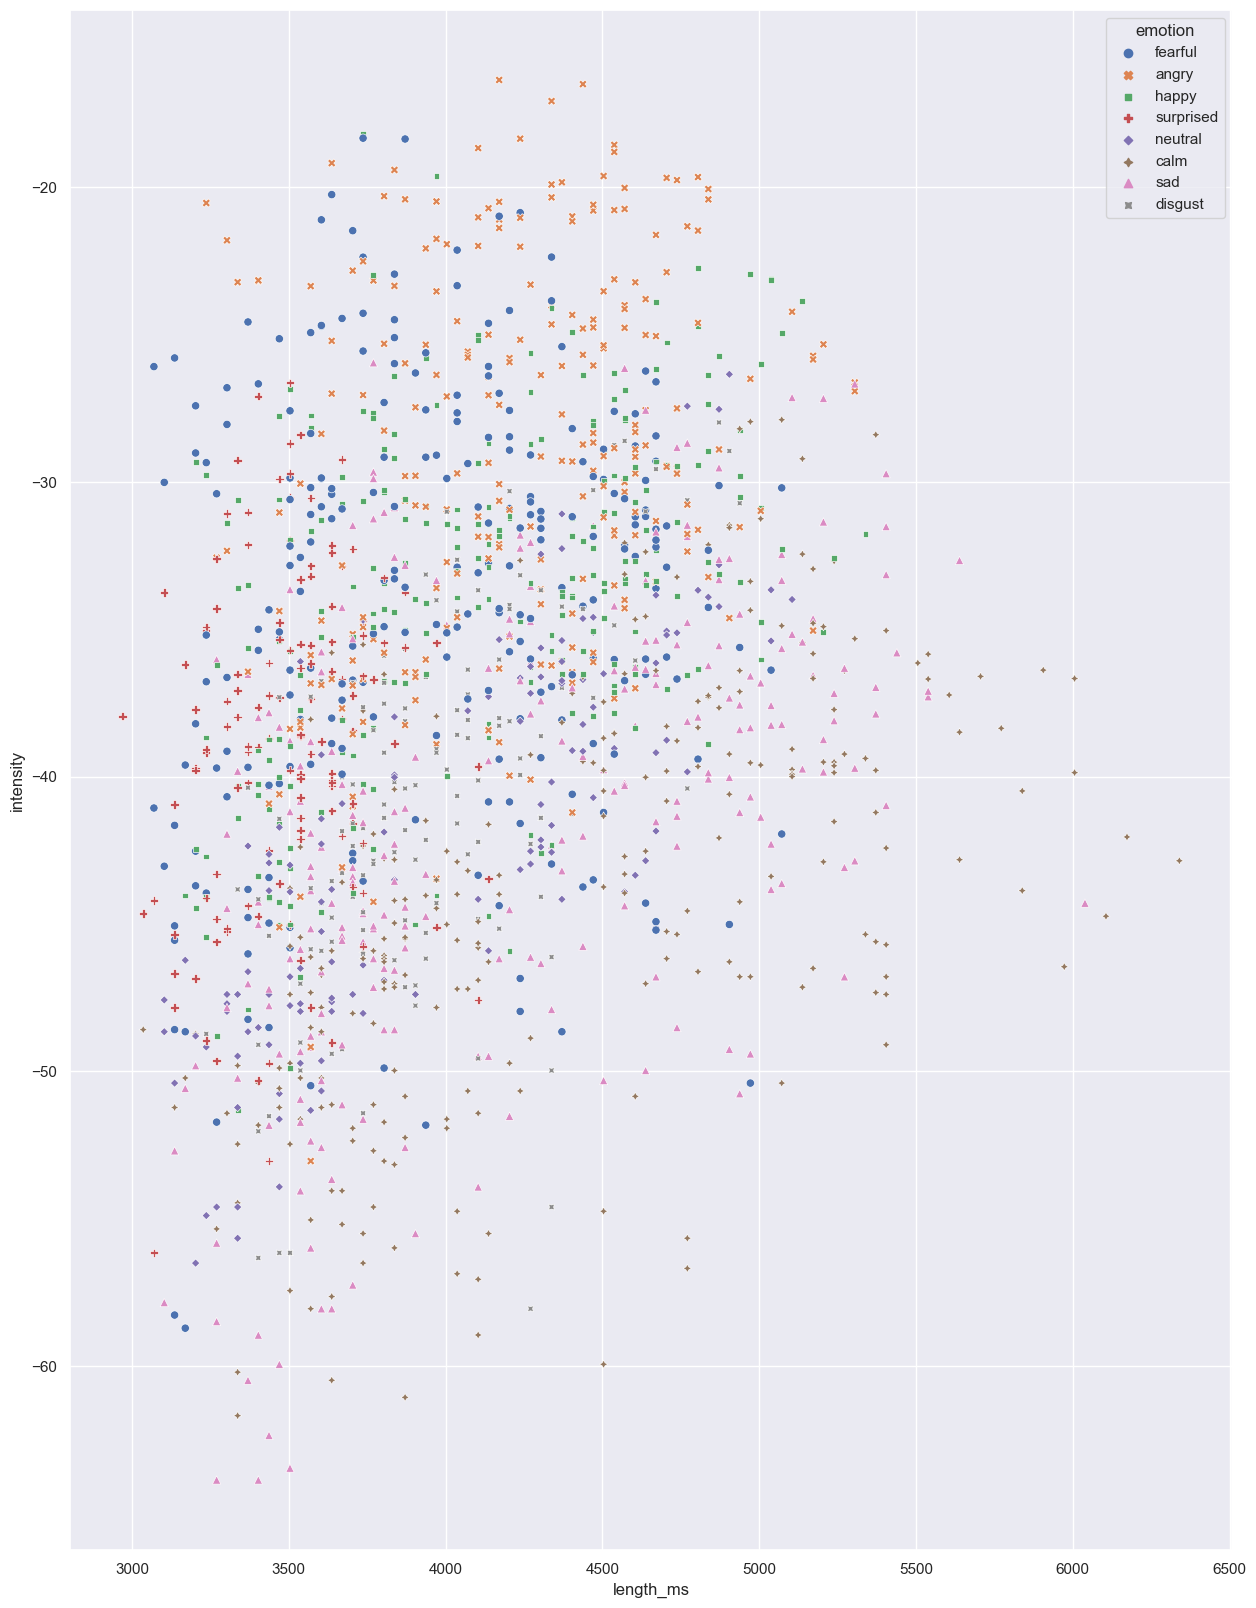

In [ ]:
sns.set(rc={'figure.figsize':(15,20)})
sns.scatterplot(data=df, x="length_ms", y="intensity", hue="emotion", style="emotion")

In [ ]:
df["intensity"].fillna(0,inplace=True)

In [ ]:
useable_dataset = df.iloc[:, 13:21]
useable_dataset

frame_count  intensity  zero_crossings_sum  mfcc_mean    mfcc_std  \
0        179379.0 -36.793432               16995 -33.485947  134.654860   
1        187387.0   0.000000               13906 -29.502108  130.485630   
2        224224.0 -32.290737               18723 -30.532463  126.577110   
3        174575.0 -49.019839               11617 -36.059555  159.725160   
4        211411.0 -31.214503               15137 -31.405996  122.125824   
...           ...        ...                 ...        ...         ...   
2447     221021.0   0.000000                9871 -30.225578  158.845500   
2448     200200.0 -43.342901                8963 -31.160332  157.499700   
2449     251451.0   0.000000                9765 -26.135280  138.133210   
2450     179379.0 -45.751265                9716 -28.242815  159.943400   
2451     184184.0 -40.018044                9427 -29.019236  149.188950   

       mfcc_min   mfcc_max      sc_mean  
0    -755.22345  171.69092  5792.550744  
1    -713.98560  205.00770  5197.620555  
2    -726.06036  165.45653  4830.743037  
3    -842.94635  190.03609  5376.446478  
4    -700.70276  161.13400  5146.012474  
...         ...        ...          ...  
2447 -855.92420  208.18497  5886.647366  
2448 -825.37410  220.79490  6602.742127  
2449 -768.36536  235.53938  4654.156076  
2450 -868.09576  219.84350  5524.736973  
2451 -799.51010  219.52780  6082.676123  

[2452 rows x 8 columns]

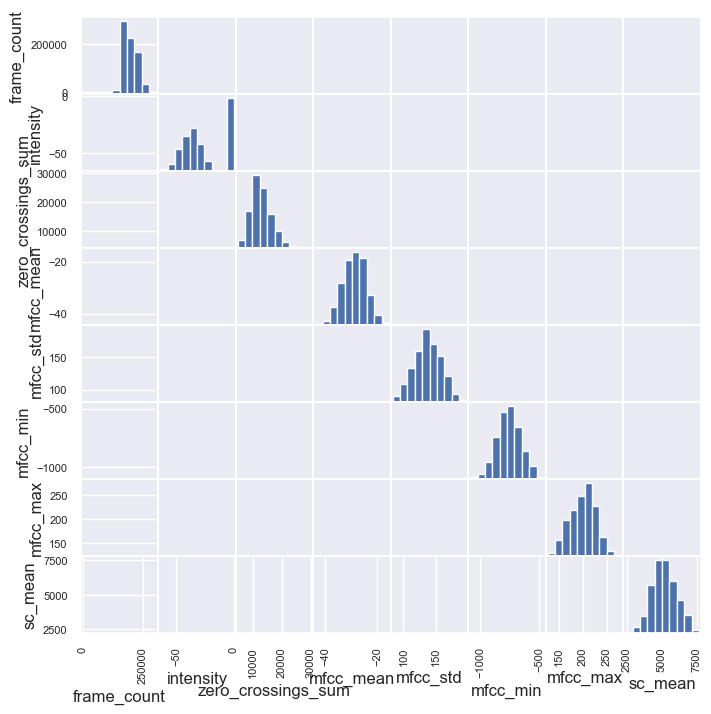

In [ ]:
pd.plotting.scatter_matrix(useable_dataset, c=useable_dataset["intensity"].map(colors), figsize=(8,8))
plt.show()

## Data Preparation - Handling Missing Values

In [ ]:
df[df['vocal_channel'].isnull()]

modality vocal_channel    emotion emotional_intensity  \
2     audio-only           NaN      happy              strong   
3     audio-only           NaN  surprised              normal   
13    audio-only           NaN       calm              strong   
43    audio-only           NaN       calm              strong   
48    audio-only           NaN       calm              normal   
...          ...           ...        ...                 ...   
2373  audio-only           NaN      angry              normal   
2404  audio-only           NaN    fearful              strong   
2434  audio-only           NaN  surprised              normal   
2446  audio-only           NaN        sad              normal   
2451  audio-only           NaN    neutral              normal   

                         statement repetition  actor sex  channels  \
2     Dogs are sitting by the door        2nd   16.0   F         1   
3     Kids are talking by the door        1st   14.0   F         1   
13    Kids are talking by the door        1st    6.0   F         1   
43    Kids are talking by the door        1st   16.0   F         1   
48    Dogs are sitting by the door        1st   16.0   F         1   
...                            ...        ...    ...  ..       ...   
2373  Kids are talking by the door        1st    NaN   F         1   
2404  Dogs are sitting by the door        2nd    NaN   M         1   
2434  Dogs are sitting by the door        1st    5.0   M         1   
2446  Kids are talking by the door        2nd   23.0   M         1   
2451  Dogs are sitting by the door        2nd   23.0   M         1   

      sample_width  ...  stft_min  stft_max  stft_kur  stft_skew  \
2                2  ...  0.000000         1 -1.242947   0.470350   
3                2  ...  0.000000         1 -1.445318   0.274756   
13               2  ...  0.000000         1 -1.259394   0.083318   
43               2  ...  0.000000         1 -0.963671   0.679458   
48               2  ...  0.000000         1 -1.252885   0.486288   
...            ...  ...       ...       ...       ...        ...   
2373             2  ...  0.000515         1 -1.323125   0.057277   
2404             2  ...  0.004346         1 -1.295628   0.135595   
2434             2  ...  0.001835         1 -0.979552  -0.572825   
2446             2  ...  0.001118         1 -1.426536   0.174377   
2451             2  ...  0.000000         1 -1.257666  -0.237757   

              mean       std       min       max        kur      skew  
2     2.430000e-06  0.024317 -0.137482  0.166351   4.881241  0.302659  
3     2.370000e-07  0.003561 -0.027374  0.024078  13.040259 -0.081014  
13    2.400000e-06  0.001859 -0.027374  0.023895  22.183236 -0.901413  
43    4.490000e-06  0.018051 -0.087524  0.083282   3.800207 -0.082290  
48   -1.990000e-06  0.015731 -0.074493  0.088593   3.678163 -0.031589  
...            ...       ...       ...       ...        ...       ...  
2373  8.380000e-07  0.036911 -0.319275  0.394623  15.339275  0.502938  
2404  9.740000e-05  0.046922 -0.384827  0.432617   7.646659 -0.158904  
2434 -1.080000e-06  0.006333 -0.061554  0.069916  13.795441 -0.153631  
2446  3.690000e-06  0.014458 -0.091187  0.090271   4.928123  0.227780  
2451  6.340000e-07  0.010001 -0.081512  0.103027  12.973181  1.032081  

[196 rows x 38 columns]

In [ ]:
df.loc[df['vocal_channel'] == 'speech'].length_ms.mean()

3700.423220973783

In [ ]:
df.loc[df['vocal_channel'] == 'song'].length_ms.mean()

4650.358306188925

In [ ]:
def getVocalChannel(length_ms):
    if length_ms < 4100:
       return "speech"
    else:
       return "song"

In [ ]:
df['vocal_channel'] = df["vocal_channel"].fillna(df['length_ms'].apply(getVocalChannel))

In [ ]:
df['vocal_channel'].head()

0    speech
1    speech
2      song
3    speech
4      song
Name: vocal_channel, dtype: object

In [ ]:
df[df['vocal_channel'].isnull()]

Empty DataFrame
Columns: [modality, vocal_channel, emotion, emotional_intensity, statement, repetition, actor, sex, channels, sample_width, frame_rate, frame_width, length_ms, frame_count, intensity, zero_crossings_sum, mfcc_mean, mfcc_std, mfcc_min, mfcc_max, sc_mean, sc_std, sc_min, sc_max, sc_kur, sc_skew, stft_mean, stft_std, stft_min, stft_max, stft_kur, stft_skew, mean, std, min, max, kur, skew]
Index: []

[0 rows x 38 columns]

In [ ]:
df[df['sex'] == "F"]['actor'].unique()

array([ 2., 16., 14., nan, 12.,  6., 22., 20.,  8., 24., 18.,  4., 10.])

In [ ]:
df[df['sex'] == "M"]['actor'].unique()

array([nan, 23.,  7., 13.,  3., 17., 21.,  1., 15.,  5., 19.,  9., 11.])

In [ ]:
males = [23, 7, 13, 3, 17, 21, 1, 15, 5, 19, 9, 11]
females = [2, 16, 14, 12, 6, 22, 20, 8, 24, 18, 4, 10]
def getActor(sex):
    if sex == "M":
       return random.choice(males)
    else:
       return random.choice(females)

In [ ]:
df['actor'] = df["actor"].fillna(df['sex'].apply(getActor))

In [ ]:
df[['sex', 'actor']].head(10)

sex  actor
0   F    2.0
1   F   16.0
2   F   16.0
3   F   14.0
4   F    2.0
5   F    8.0
6   F    2.0
7   F    8.0
8   F   12.0
9   F   12.0

In [ ]:
df['intensity'].head(25)

0    -36.793432
1           NaN
2    -32.290737
3    -49.019839
4    -31.214503
5    -36.312244
6           NaN
7    -49.095042
8    -45.906837
9           NaN
10          NaN
11          NaN
12          NaN
13   -54.745974
14   -43.823350
15   -35.549252
16   -47.831966
17   -22.367588
18   -27.461209
19   -41.585746
20   -31.761591
21   -37.016159
22   -30.413860
23          NaN
24   -40.680146
Name: intensity, dtype: float64

In [ ]:
df['intensity'] = df['intensity'].interpolate()

In [ ]:
df['intensity'].head(25)

0    -36.793432
1    -34.542085
2    -32.290737
3    -49.019839
4    -31.214503
5    -36.312244
6    -42.703643
7    -49.095042
8    -45.906837
9    -47.674664
10   -49.442492
11   -51.210319
12   -52.978146
13   -54.745974
14   -43.823350
15   -35.549252
16   -47.831966
17   -22.367588
18   -27.461209
19   -41.585746
20   -31.761591
21   -37.016159
22   -30.413860
23   -35.547003
24   -40.680146
Name: intensity, dtype: float64

## Outliers Detection

In [ ]:
df.describe()

actor     channels  sample_width  frame_rate  frame_width  \
count  2452.000000  2452.000000        2452.0      2452.0  2452.000000   
mean     12.555465     1.002447           2.0     48000.0     2.004894   
std       6.886960     0.049416           0.0         0.0     0.098833   
min       1.000000     1.000000           2.0     48000.0     2.000000   
25%       7.000000     1.000000           2.0     48000.0     2.000000   
50%      12.000000     1.000000           2.0     48000.0     2.000000   
75%      19.000000     1.000000           2.0     48000.0     2.000000   
max      24.000000     2.000000           2.0     48000.0     4.000000   

         length_ms    frame_count    intensity  zero_crossings_sum  \
count  2452.000000    2452.000000  2452.000000         2452.000000   
mean   4092.151305  193587.188010   -37.744288        12885.314029   
std     598.321526   36825.369056     7.861951         3665.319584   
min    2936.000000      -1.000000   -63.864613         4721.000000   
25%    3604.000000  172972.000000   -43.074442        10362.500000   
50%    4004.000000  190591.000000   -37.341798        12383.500000   
75%    4538.000000  217817.000000   -32.377447        14966.000000   
max    6373.000000  305906.000000   -16.353953        30153.000000   

         mfcc_mean  ...     stft_min  stft_max     stft_kur    stft_skew  \
count  2452.000000  ...  2452.000000    2452.0  2452.000000  2452.000000   
mean    -28.769180  ...     0.002272       1.0    -1.247929     0.112889   
std       4.461886  ...     0.004830       0.0     0.211781     0.330759   
min     -43.812923  ...     0.000000       1.0    -1.669603    -0.993957   
25%     -31.828597  ...     0.000000       1.0    -1.390612    -0.094334   
50%     -28.681109  ...     0.000190       1.0    -1.292105     0.126065   
75%     -25.550238  ...     0.001999       1.0    -1.152519     0.335574   
max     -15.491450  ...     0.039378       1.0     0.794669     1.465815   

               mean          std          min          max          kur  \
count  2.452000e+03  2452.000000  2452.000000  2452.000000  2452.000000   
mean   1.418966e-08     0.020504    -0.164871     0.179839    11.203002   
std    4.267597e-05     0.021024     0.175443     0.195539     6.614859   
min   -9.435580e-04     0.000652    -0.998810     0.004669     1.757794   
25%   -1.395000e-06     0.006791    -0.202431     0.055489     6.519988   
50%   -9.810000e-08     0.013880    -0.103775     0.109726     9.828686   
75%    8.362500e-07     0.026154    -0.054352     0.224487    14.085435   
max    1.222810e-03     0.152168    -0.006134     0.999146    59.085695   

              skew  
count  2452.000000  
mean     -0.048245  
std       0.454925  
min      -2.356526  
25%      -0.336624  
50%       0.004256  
75%       0.262978  
max       1.799676  

[8 rows x 31 columns]

In [ ]:
df[df['frame_count'] == -1].count()

vocal_channel          32
emotion                35
emotional_intensity    35
statement              35
repetition             35
actor                  16
sex                    35
channels               35
sample_width           35
frame_rate             35
frame_width            35
length_ms              35
frame_count            35
intensity              35
zero_crossings_sum     35
mfcc_mean              35
mfcc_std               35
mfcc_min               35
mfcc_max               35
sc_mean                35
sc_std                 35
sc_min                 35
sc_max                 35
sc_kur                 35
sc_skew                35
stft_mean              35
stft_std               35
stft_min               35
stft_max               35
stft_kur               35
stft_skew              35
mean                   35
std                    35
min                    35
max                    35
kur                    35
skew                   35
dtype: int64

<AxesSubplot:xlabel='frame_count'>

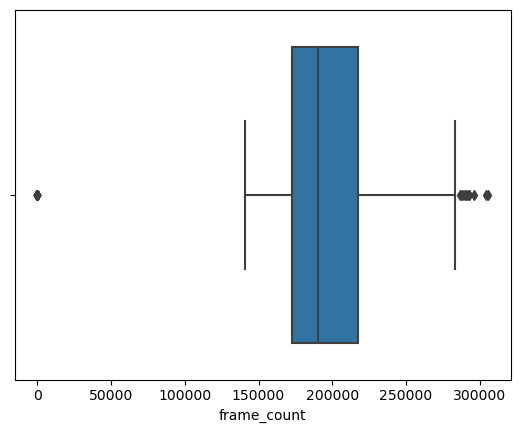

In [ ]:
sns.boxplot(x=df['frame_count'])

In [ ]:
df = df.drop(df[df.frame_count == -1].index)

<AxesSubplot:xlabel='frame_count'>

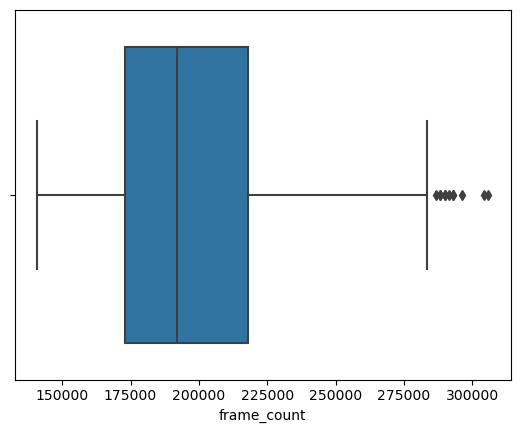

In [ ]:
sns.boxplot(x=df['frame_count'])

## Variable Transformation

In [ ]:
modality = sorted(df['modality'].unique())
modality_mapping = dict(zip(modality, range(0, len(sexes) + 1)))
df['modality'] = df['modality'].map(modality_mapping).astype(int)

KeyError: 'modality'

In [ ]:
sexes = sorted(df['sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
df['sex'] = df['sex'].map(genders_mapping).astype(int)

In [ ]:
vocal_channel_locs = sorted(df['vocal_channel'].unique())
vocal_channel_mapping = dict(zip(vocal_channel_locs, range(0, len(vocal_channel_locs) + 1)))
df['vocal_channel'] = df['vocal_channel'].map(vocal_channel_mapping).astype(int)

In [ ]:
emotion_locs = sorted(df['emotion'].unique())
emotion_mapping = dict(zip(emotion_locs, range(0, len(emotion_locs) + 1)))
df['emotion'] = df['emotion'].map(emotion_mapping).astype(int)

In [ ]:
emotional_intensity = sorted(df['emotional_intensity'].unique())
emotional_intensity_mapping = dict(zip(emotional_intensity, range(0, len(emotional_intensity) + 1)))
df['emotional_intensity'] = df['emotional_intensity'].map(emotional_intensity_mapping).astype(int)

In [ ]:
statement = sorted(df['statement'].unique())
statement_mapping = dict(zip(statement, range(0, len(statement) + 1)))
df['statement'] = df['statement'].map(statement_mapping).astype(int)

In [ ]:
repetition = sorted(df['repetition'].unique())
repetition_mapping = dict(zip(repetition, range(0, len(repetition) + 1)))
df['repetition'] = df['repetition'].map(repetition_mapping).astype(int)

In [ ]:
print(df[['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'sex']])

      vocal_channel  emotion  emotional_intensity  statement  repetition  sex
0                 1        3                    0          0           1    0
1                 1        0                    0          0           0    0
2                 0        4                    1          0           1    0
3                 1        7                    0          1           0    0
4                 0        4                    1          0           1    0
...             ...      ...                  ...        ...         ...  ...
2447              1        1                    1          1           0    1
2448              1        1                    0          0           0    1
2449              0        6                    1          0           1    1
2450              1        7                    0          1           0    1
2451              1        5                    0          0           1    1

[2417 rows x 6 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2417 entries, 0 to 2451
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modality             2417 non-null   object 
 1   vocal_channel        2417 non-null   int64  
 2   emotion              2417 non-null   int64  
 3   emotional_intensity  2417 non-null   int64  
 4   statement            2417 non-null   int64  
 5   repetition           2417 non-null   int64  
 6   actor                2417 non-null   float64
 7   sex                  2417 non-null   int64  
 8   channels             2417 non-null   int64  
 9   sample_width         2417 non-null   int64  
 10  frame_rate           2417 non-null   int64  
 11  frame_width          2417 non-null   int64  
 12  length_ms            2417 non-null   int64  
 13  frame_count          2417 non-null   int64  
 14  intensity            2417 non-null   float64
 15  zero_crossings_sum   2417 non-null   i

In [ ]:
df.to_csv('/Users/mumer/My Data/Unipi - Study Material/Semester - 1st/DATA MINING/Project/ravdess_dm1_2223/ravdess_features-cleaned-transformed.csv')

NameError: name 'df' is not defined

## Pairwise Correlations and Elimination of Variables

In [ ]:
# import dataset
df = pd.read_csv("/Users/mumer/My Data/Unipi - Study Material/Semester - 1st/DATA MINING/Project/ravdess_dm1_2223/ravdess_features-cleaned-transformed.csv", skipinitialspace=True)
df.head()

Unnamed: 0  modality  vocal_channel  emotion  emotional_intensity  \
0           0         0              1        3                    0   
1           1         0              1        0                    0   
2           2         0              0        4                    1   
3           3         0              1        7                    0   
4           4         0              0        4                    1   

   statement  repetition  actor  sex  channels  ...  stft_min  stft_max  \
0          0           1    2.0    0         1  ...       0.0         1   
1          0           0   16.0    0         1  ...       0.0         1   
2          0           1   16.0    0         1  ...       0.0         1   
3          1           0   14.0    0         1  ...       0.0         1   
4          0           1    2.0    0         1  ...       0.0         1   

   stft_kur  stft_skew          mean       std       min       max        kur  \
0 -1.215025   0.403514  3.840000e-07  0.014482 -0.128632  0.138947   9.406061   
1 -1.384174   0.290905 -7.150000e-08  0.020417 -0.305725  0.263062  19.564187   
2 -1.242947   0.470350  2.430000e-06  0.024317 -0.137482  0.166351   4.881241   
3 -1.445318   0.274756  2.370000e-07  0.003561 -0.027374  0.024078  13.040259   
4 -1.366742   0.318926  8.450000e-07  0.027522 -0.192169  0.242676   7.485109   

       skew  
0  0.273153  
1  0.292157  
2  0.302659  
3 -0.081014  
4  0.414872  

[5 rows x 39 columns]

In [ ]:
df = df.drop(['modality', 'channels', 'sample_width', 'frame_rate', 'frame_width'], axis=1)

In [ ]:
df = df.drop(['stft_max'], axis=1)

In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
df_dropped = df.drop(['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'sex',
                    'actor',], axis=1)

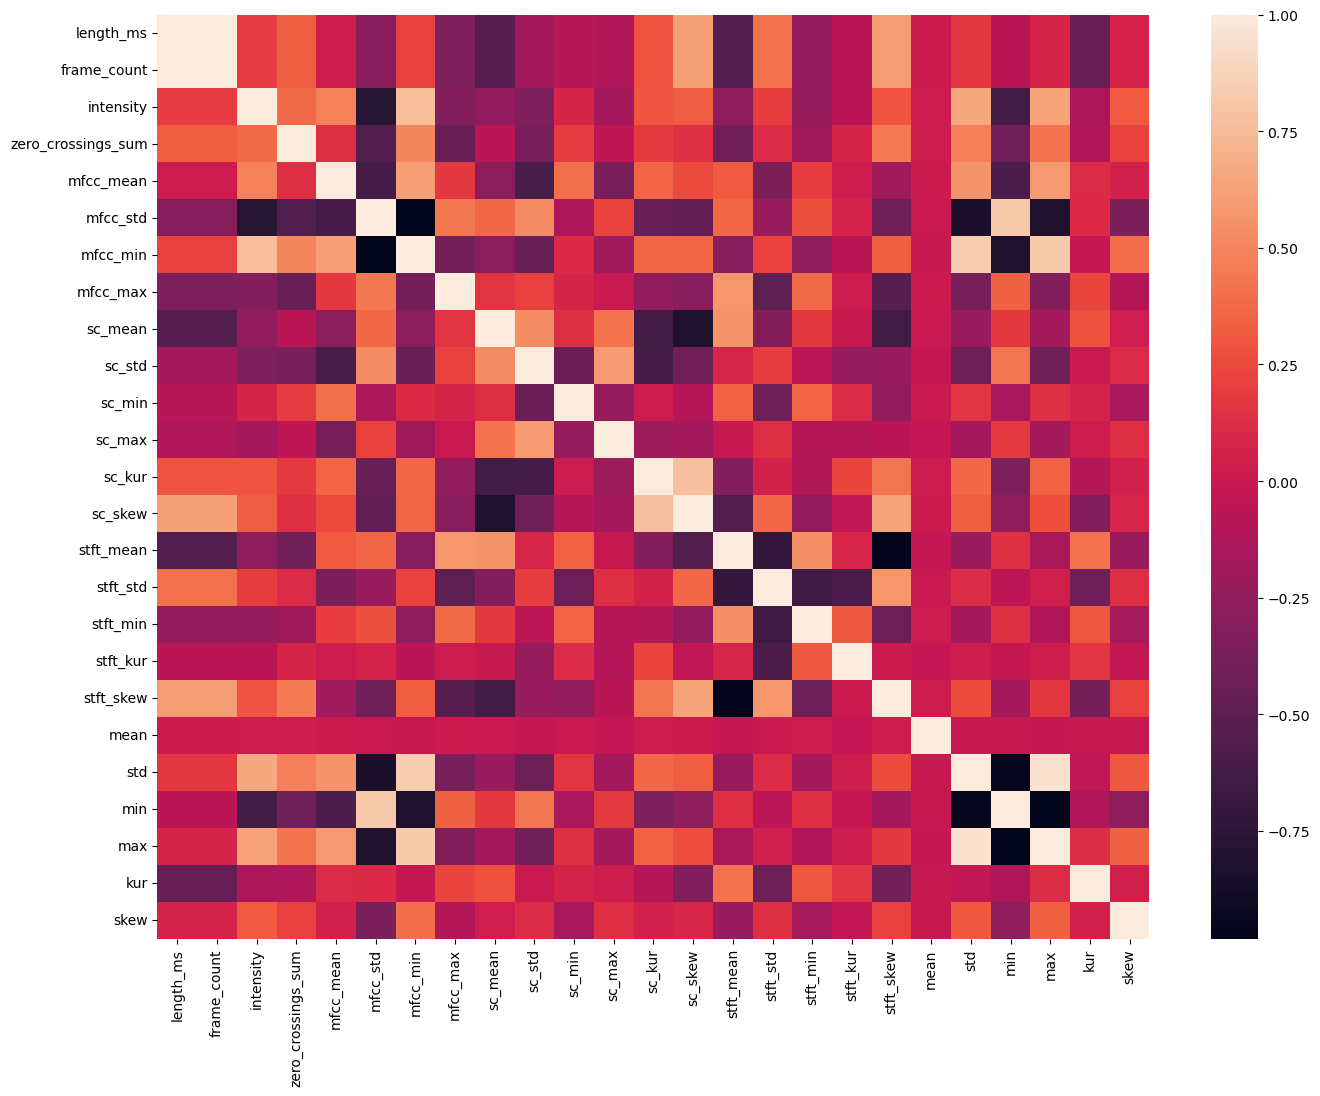

In [ ]:
matrix = df_dropped.corr()

plt.figure(figsize=(16,12))

_ = sns.heatmap(matrix)

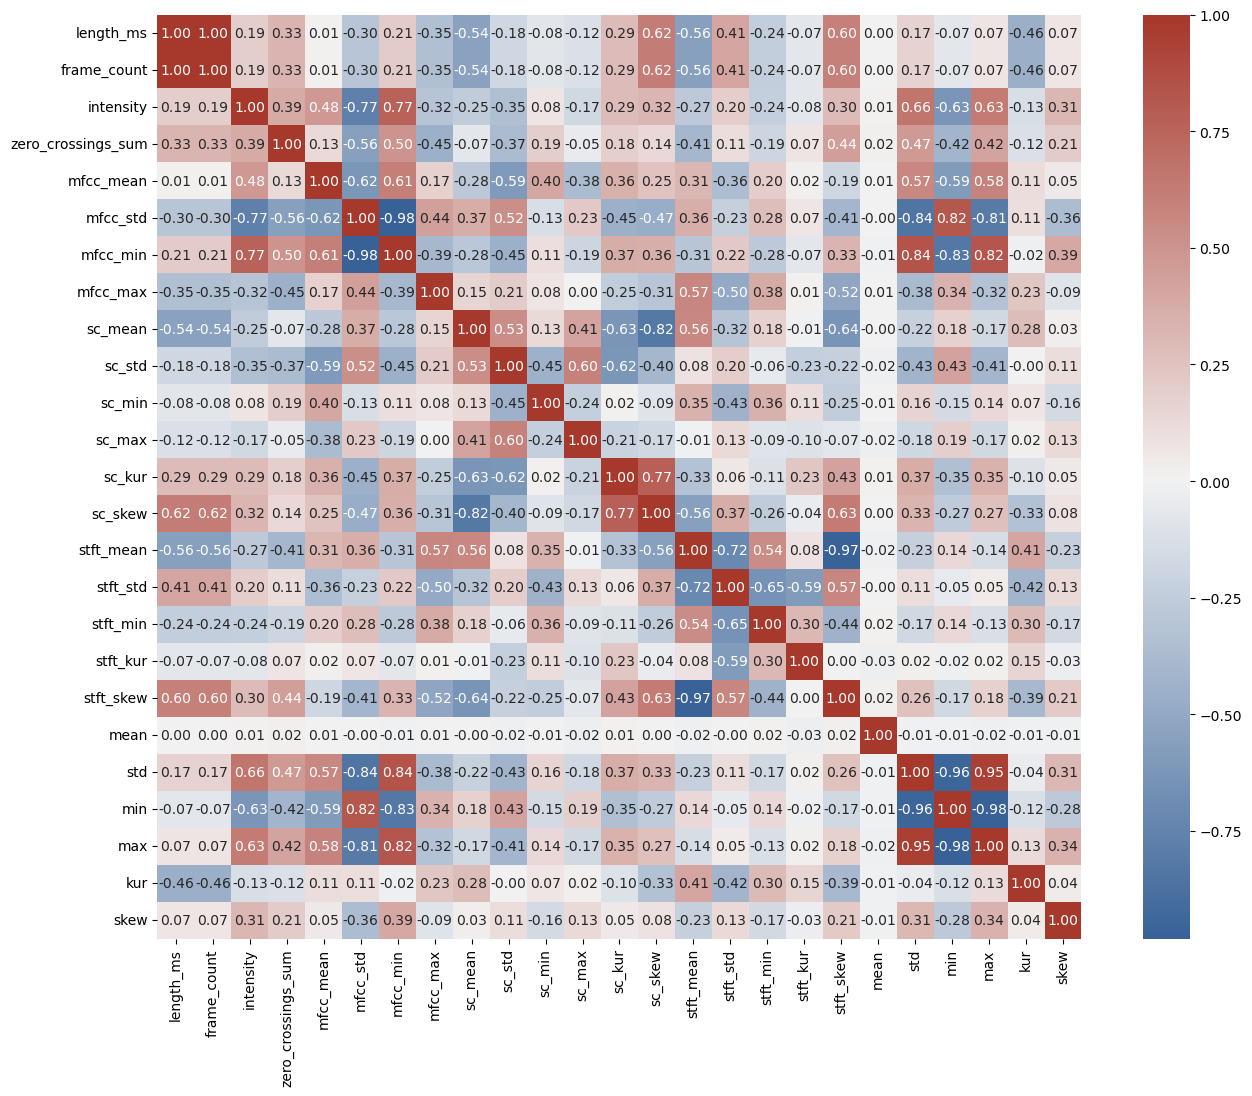

In [ ]:
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True,
                fmt='.2f', square=True, cmap=cmap)

<AxesSubplot:>

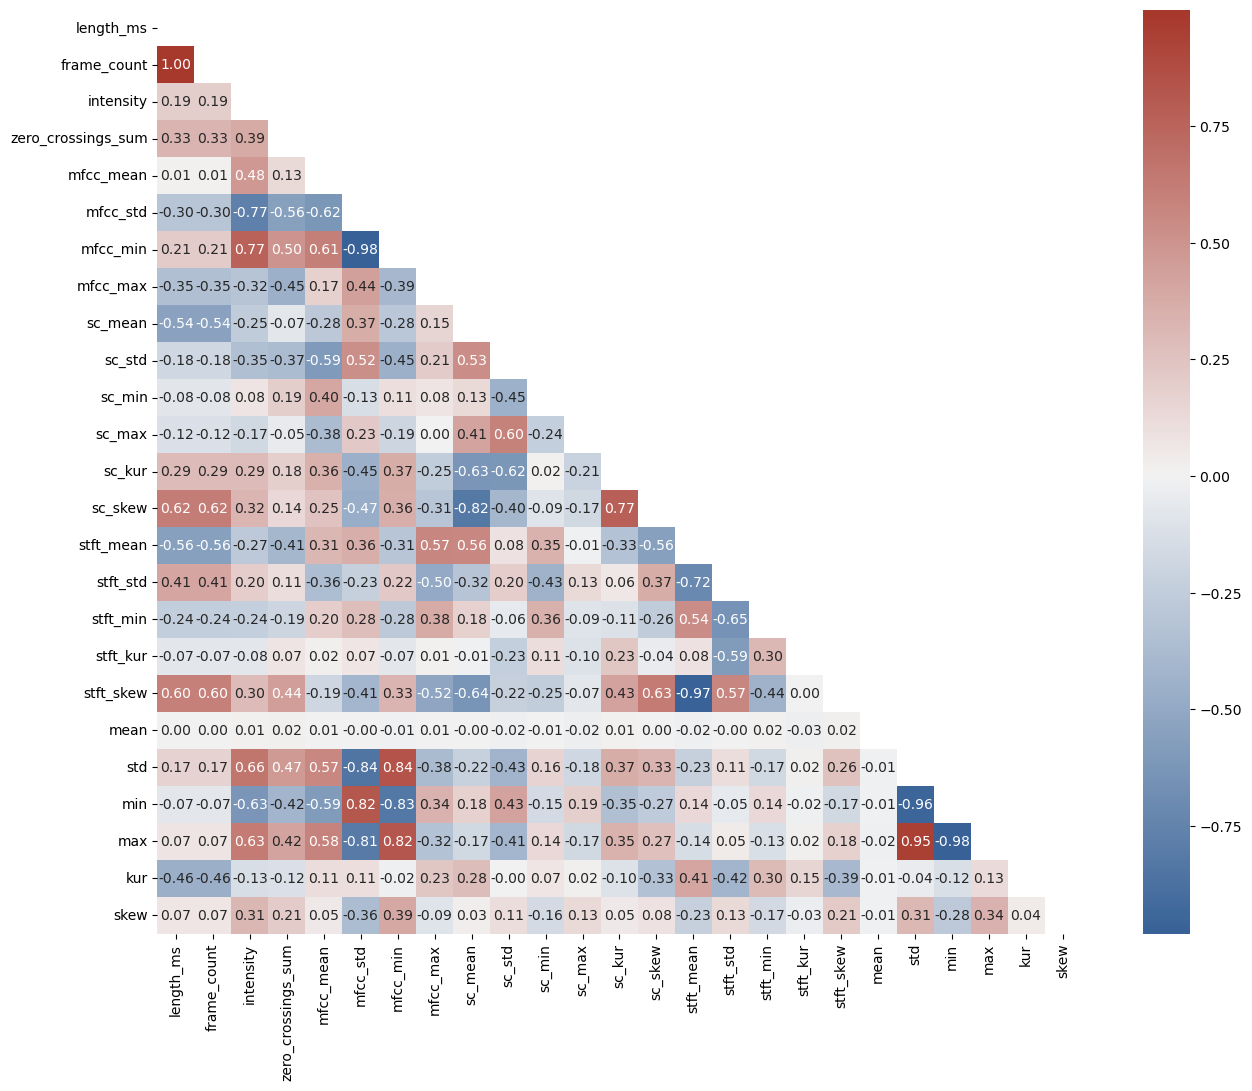

In [ ]:
# Create a mask
plt.figure(figsize=(16,12))

mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

In [ ]:
df = df_dropped.drop(['frame_count', 'mfcc_min', 'mfcc_std', 'sc_skew', 'std', 'min',
                    'max', 'stft_skew'], axis=1)

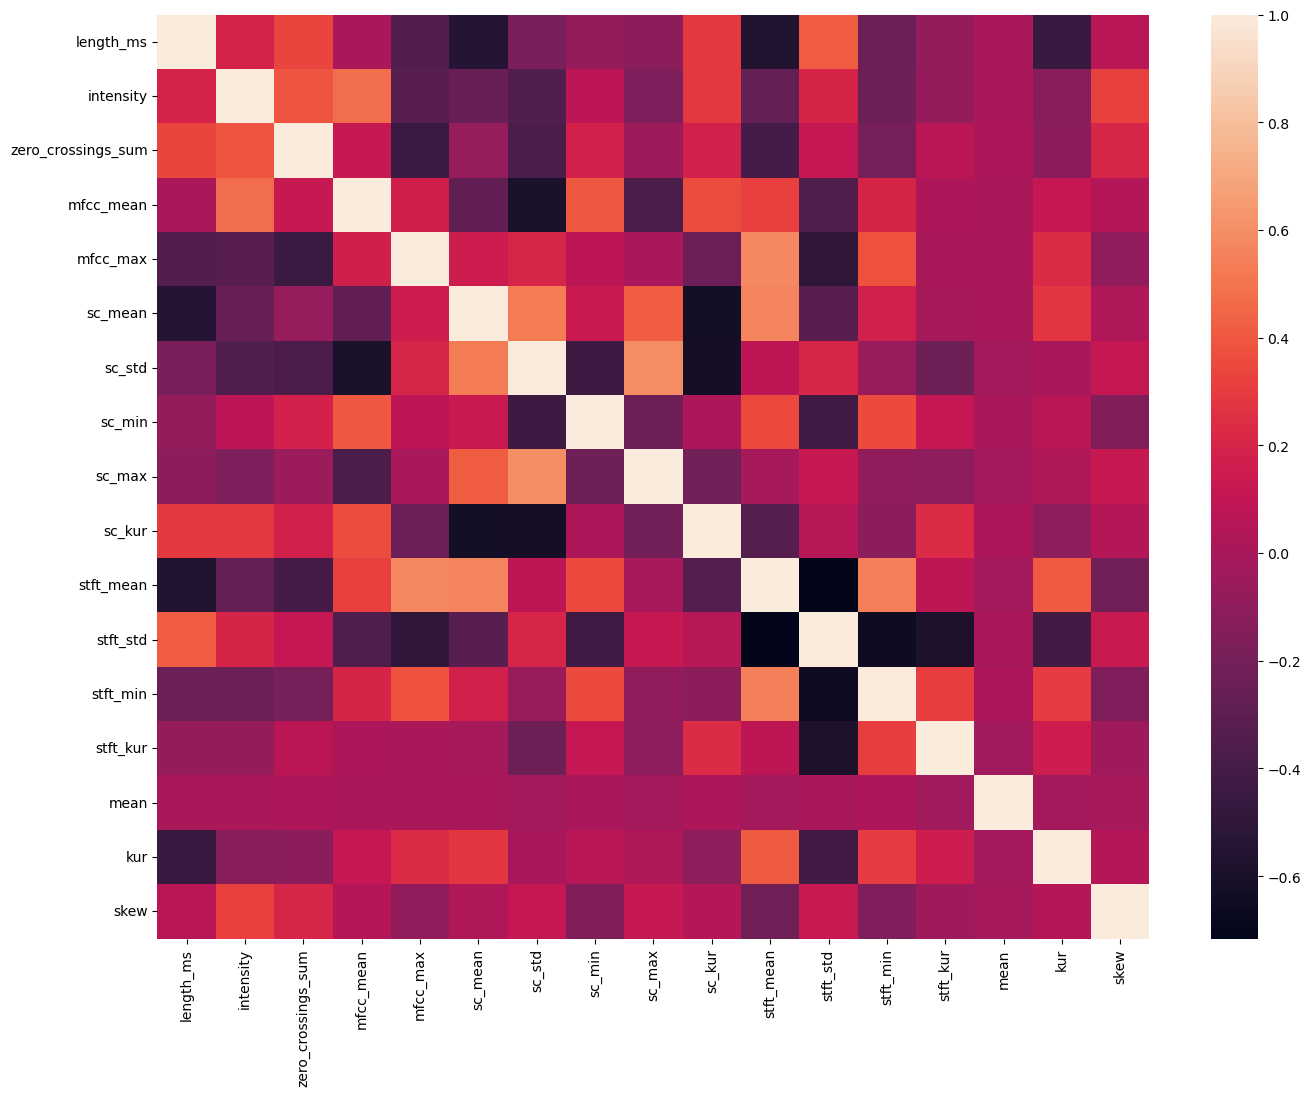

In [ ]:
matrix = df.corr()

plt.figure(figsize=(16,12))

_ = sns.heatmap(matrix)

<AxesSubplot:>

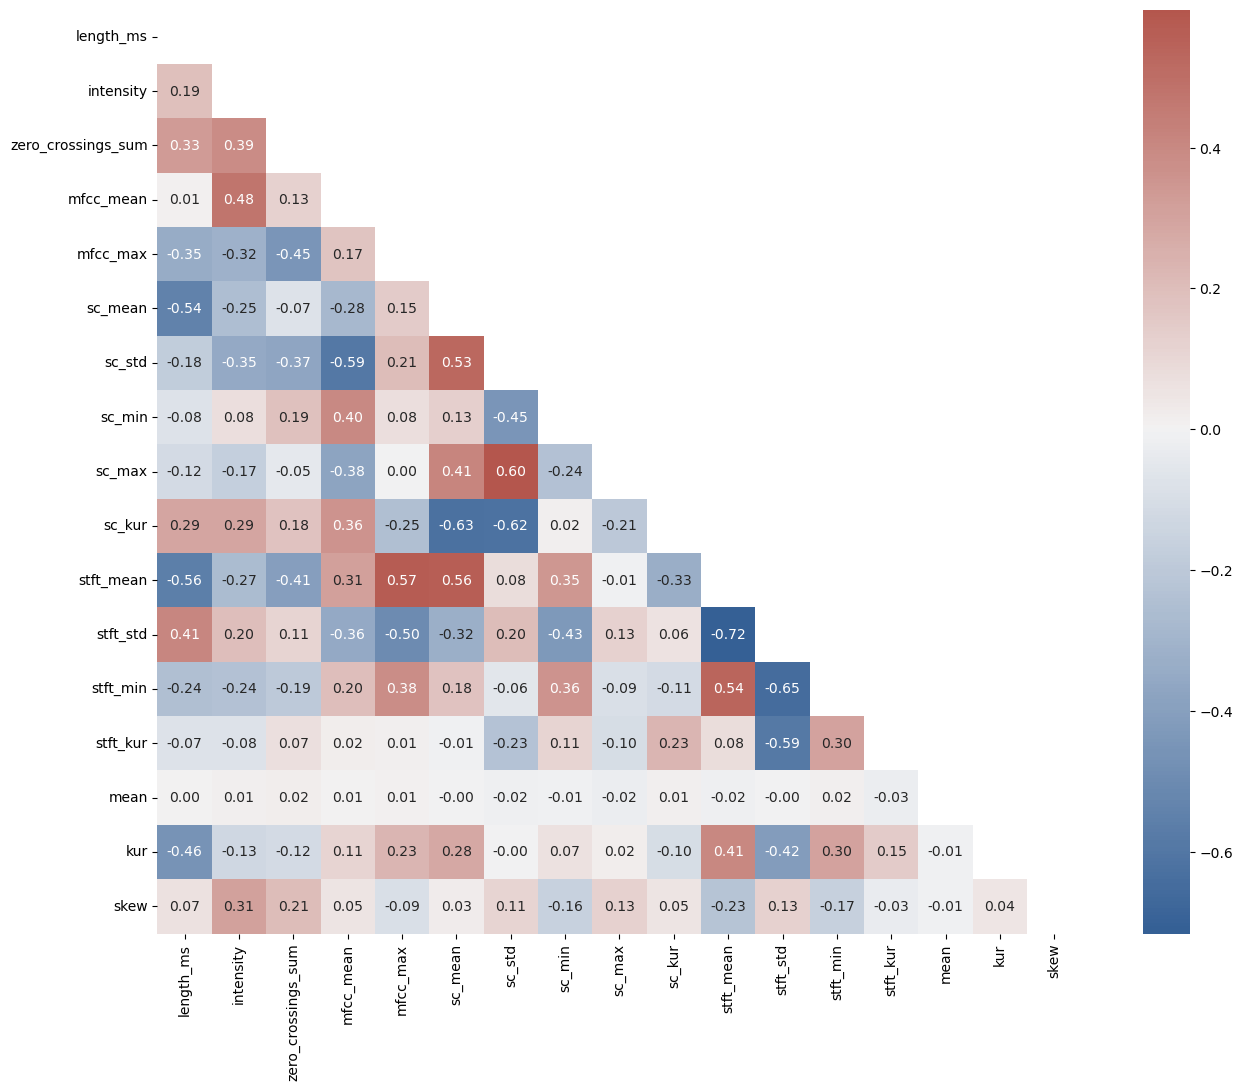

In [ ]:
# Create a mask
plt.figure(figsize=(16,12))

mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

In [ ]:
df.corr()

length_ms  intensity  zero_crossings_sum  mfcc_mean  \
length_ms            1.000000   0.191768            0.331158   0.010239   
intensity            0.191768   1.000000            0.388055   0.476891   
zero_crossings_sum   0.331158   0.388055            1.000000   0.128609   
mfcc_mean            0.010239   0.476891            0.128609   1.000000   
mfcc_max            -0.346807  -0.316067           -0.448766   0.174947   
sc_mean             -0.544216  -0.253826           -0.071350  -0.281320   
sc_std              -0.179825  -0.353703           -0.372155  -0.593648   
sc_min              -0.078471   0.076220            0.188889   0.399432   
sc_max              -0.115780  -0.170937           -0.048420  -0.375971   
sc_kur               0.291239   0.289384            0.180369   0.357755   
stft_mean           -0.560935  -0.269853           -0.405588   0.314997   
stft_std             0.410205   0.200892            0.114070  -0.355717   
stft_min            -0.244968  -0.235513           -0.193627   0.199679   
stft_kur            -0.072681  -0.075066            0.072318   0.020872   
mean                 0.004940   0.013869            0.020660   0.006270   
kur                 -0.459834  -0.131518           -0.115347   0.112754   
skew                 0.067558   0.312347            0.206164   0.054820   

                    mfcc_max   sc_mean    sc_std    sc_min    sc_max  \
length_ms          -0.346807 -0.544216 -0.179825 -0.078471 -0.115780   
intensity          -0.316067 -0.253826 -0.353703  0.076220 -0.170937   
zero_crossings_sum -0.448766 -0.071350 -0.372155  0.188889 -0.048420   
mfcc_mean           0.174947 -0.281320 -0.593648  0.399432 -0.375971   
mfcc_max            1.000000  0.149154  0.206554  0.078000  0.000694   
sc_mean             0.149154  1.000000  0.529228  0.130662  0.413615   
sc_std              0.206554  0.529228  1.000000 -0.445535  0.596108   
sc_min              0.078000  0.130662 -0.445535  1.000000 -0.237644   
sc_max              0.000694  0.413615  0.596108 -0.237644  1.000000   
sc_kur             -0.245593 -0.627878 -0.619472  0.015079 -0.207872   
stft_mean           0.571912  0.560631  0.083000  0.349512 -0.011127   
stft_std           -0.496349 -0.322087  0.203008 -0.434037  0.126122   
stft_min            0.383183  0.178108 -0.056684  0.355962 -0.091857   
stft_kur            0.012013 -0.009146 -0.234175  0.111986 -0.103321   
mean                0.008064 -0.002639 -0.016343 -0.005092 -0.024246   
kur                 0.231351  0.281084 -0.002715  0.067511  0.021438   
skew               -0.091369  0.025767  0.113132 -0.157585  0.127159   

                      sc_kur  stft_mean  stft_std  stft_min  stft_kur  \
length_ms           0.291239  -0.560935  0.410205 -0.244968 -0.072681   
intensity           0.289384  -0.269853  0.200892 -0.235513 -0.075066   
zero_crossings_sum  0.180369  -0.405588  0.114070 -0.193627  0.072318   
mfcc_mean           0.357755   0.314997 -0.355717  0.199679  0.020872   
mfcc_max           -0.245593   0.571912 -0.496349  0.383183  0.012013   
sc_mean            -0.627878   0.560631 -0.322087  0.178108 -0.009146   
sc_std             -0.619472   0.083000  0.203008 -0.056684 -0.234175   
sc_min              0.015079   0.349512 -0.434037  0.355962  0.111986   
sc_max             -0.207872  -0.011127  0.126122 -0.091857 -0.103321   
sc_kur              1.000000  -0.328447  0.059085 -0.112184  0.231036   
stft_mean          -0.328447   1.000000 -0.715966  0.537823  0.081874   
stft_std            0.059085  -0.715966  1.000000 -0.649819 -0.586770   
stft_min           -0.112184   0.537823 -0.649819  1.000000  0.303793   
stft_kur            0.231036   0.081874 -0.586770  0.303793  1.000000   
mean                0.014857  -0.015915 -0.000417  0.016268 -0.028199   
kur                -0.104404   0.405344 -0.415838  0.302289  0.150111   
skew                0.050918  -0.225514  0.129197 -0.166117 -0.034144   

                        mean       kur      skew  
length